In [ ]:
## Import the libraries:

import numpy as np
import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ## For data visualization

In [ ]:
### Read the dataset

brfss2018=pd.read_csv('brfss2018.csv')
brfss2018

In [ ]:
## Shape of the dataset
brfss2018.shape

In [ ]:
## Head of the dataset
print(brfss2018.head(10))

In [ ]:
### Renaming the first column:
brfss2018.rename(columns={"Unnamed: 0":"ID"}, inplace=True)
brfss2018

In [ ]:
### Information of the dataset
brfss2018.info()

In [ ]:
### Looking the the unique datatypes in the dataframe:
list(set(brfss2018.dtypes.tolist()))

In [ ]:
### Selecting the columns with int and float datatype
brfss2018_num = brfss2018.select_dtypes(include = ['float64', 'int64'])
brfss2018_num.head()

In [ ]:
## Looking at the column names in the dataset:
brfss2018.columns

In [ ]:
def printmd(string):
    display(Markdown(string))

from IPython.display import Markdown, display 
    
# Setting all the categorical columns to type category
for col in set(brfss2018.columns) - set(brfss2018.describe().columns):
    brfss2018[col] = brfss2018[col].astype('category')
    
printmd('## 1.1. Columns and their types')
print(brfss2018.info())

In [ ]:
#### Creating the date time stamp by joining year + Month + day column

brfss2018['Date']=(pd.to_datetime(brfss2018['iyear'].astype(str) + '-' +
                brfss2018['imonth'].astype(str) + '-' +
                brfss2018['iday'].astype(str)))
brfss2018['Date']

### Get Month-Year from the date:

brfss2018['Month_Year']= brfss2018['Date'].dt.strftime('%b-%Y')
brfss2018['Month_Year']

In [ ]:
brfss2018['Month_Year'].value_counts()

In [ ]:
brfss2018['Month_Year']=brfss2018['Month_Year'].astype('category',
                                                       categories=["Jan-2018",
                                                                   "Feb-2018",
                                                                   "Mar-2018",
                                                                   "Apr-2018",
                                                                   "May-2018",
                                                                   "Jun-2018",
                                                                   "Jul-2018",
                                                                   "Aug-2018",
                                                                   "Sep-2018",
                                                                   "Oct-2018",
                                                                   "Nov-2018",
                                                                   "Dec-2018"],
                                                       ordered = True)

brfss2018.groupby('Month_Year')['ID'].count()

In [ ]:
## Frequency
c=brfss2018["Month_Year"].value_counts(dropna=False)
p=brfss2018["Month_Year"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

In [ ]:
MonthVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['Month_Year'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
MonthVsHealthPlan

In [ ]:
#General Columns:

General=brfss2018[["ID", "imonth", "iday", "iyear", "x.state", "sex1", "marital", "educa", "renthom1",
          "numhhol3", "numphon3", "cpdemo1b",  "veteran3", "employ1", "children", "income2",
          "weight2", "height3", "pregnant", "x.hispanc", "x.race", "x.hispanc", "x.race", "cstate1"]]

In [ ]:
#General Columns:

General=brfss2018[["ID", "imonth", "iday", "iyear", "x.state", "sex1", "marital", "educa", "renthom1",
          "numhhol3", "numphon3", "cpdemo1b",  "veteran3", "employ1", "children", "income2",
          "weight2", "height3", "pregnant", "x.hispanc", "x.race", "x.hispanc", "x.race", "cstate1"]]

# Demographic:

Demographic=brfss2018[["sex1", "x.hispanc", "x.mrace1", "x.race.g1", "x.raceg21", "x.racegr3",
           "numhhol3", "numphon3", "cpdemo1b", "veteran3", "employ1","income2", "pregnant",
           "educa", "marital", "educa", "renthom1"]]
Demographic


#Healthcare Access Module:

HCA_Module= brfss2018[["medicare", "hlthcvr1", "delayme1", "dlyother", "nocov121", "lstcovrg",
                       "drvisits", "medscos1", "carercvd", "medbill1"]]
HCA_Module


# Healthcare Access Core:

HCA_Core= brfss2018[["hlthpln1", "persdoc2", "medcost", "checkup1"]]
HCA_Core

In [ ]:
# Demographic:

Demographic=brfss2018[["sex1", "x.hispanc", "x.mrace1", "x.race.g1", "x.raceg21", "x.racegr3",
           "numhhol3", "numphon3", "cpdemo1b", "veteran3", "employ1","income2", "pregnant",
           "educa", "marital", "educa", "renthom1"]]
Demographic

In [ ]:
# Healthcare Access Core:

HCA_Core= brfss2018[["hlthpln1", "persdoc2", "medcost", "checkup1"]]
HCA_Core

In [ ]:
#Healthcare Access Module:

HCA_Module= brfss2018[["medicare", "hlthcvr1", "delayme1", "dlyother", "nocov121", "lstcovrg",
                       "drvisits", "medscos1", "carercvd", "medbill1"]]
HCA_Module

In [ ]:
# Demographic:

Demographic=brfss2018[["sex1", "x.hispanc", "x.mrace1", "x.race.g1", "x.raceg21", "x.racegr3",
           "numhhol3", "numphon3", "cpdemo1b", "veteran3", "employ1","income2", "pregnant",
           "educa", "marital", "educa", "renthom1"]]
Demographic

In [ ]:
#### Demographics : Question --- Age

### What is your age?

print (brfss2018["x.age80"].value_counts())

In [ ]:

brfss2018.columns

In [ ]:
list(brfss2018.columns.values)

In [ ]:
brfss2018.iloc[:,55].name

In [ ]:
#### Demographics : Question --- Residency State

### In what state do you currently live?

print (brfss2018["x.state"].value_counts())



## Create a dictionary and replace the value
state = {1: "Alabama",
            2: "Alaska",
            4: "Arizona",
            5: "Arkansas",
            6: "California",
            8: "Colorado",
            9: "Connecticut",
            10: "Delaware",
            11: "District of Columbia",
            12:"Florida",
            13:"Georgia",
            15:"Hawaii",
            16:"Idaho",
            17:"Illinois",
            18:"Indiana",
            19:"Iowa",
            20:"Kansas",
            21:"Kentucky",
            22:"Louisiana",
            23:"Maine",
            24:"Maryland",
            25:"Massachusetts",
            26:"Michigan",
            27:"Minnesota",
            28:"Mississippi",
            29:"Missouri",
            30:"Montana",
            31:"Nebraska",
            32:"Nevada",
            33:"New Hampshire",
            34:"New Jersey",
            35:"New Mexico",
            36:"New York",
            37:"North Carolina",
            38:"North Dakota",
            39:"Ohio",
            40:"Oklahoma",
            41:"Oregon",
            42:"Pennsylvania",
            44:"Rhode Island",
            45:"South Carolina",
            46:"South Dakota",
            47:"Tennessee",
            48:"Texas",
            49:"Utah",
            50:"Vermont",
            51:"Virginia",
            53:"Washington",
            54:"West Virginia",
            55:"Wisconsin",
            56:"Wyoming",
            66:"Guam",
            72:"Puerto Rico",
            78:"Virgin Island"
           }

brfss2018["x.state"]=brfss2018["x.state"].replace(state)

## Frequency
c=brfss2018["x.state"].value_counts(dropna=False)
p=brfss2018["x.state"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

In [ ]:
#### Demographics : Question - Sex

### Format1: What is your sex?
### Format2: What was your sex at birth? Was it .........

print (brfss2018["sex1"].value_counts())

## Create a dictionary and replace the value
Sex = {1:"Male",2:"Female",7:"Don't Know / Not Sure", 9: "Refused"}
brfss2018["sex1"]=brfss2018["sex1"].replace(Sex)


## Frequency
c=brfss2018["sex1"].value_counts(dropna=False)
p=brfss2018["sex1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

In [ ]:

print(brfss2018['sex1'].count())  ### Non-null row count of sex column

print(len(brfss2018['sex1']))  ### Total row count of sex column


In [ ]:
Sex_Viz=brfss2018["sex1"].value_counts(dropna=False, normalize=True)*100
plt.figure(figsize=(10,5))
sns.barplot(Sex_Viz.index, Sex_Viz.values, alpha=0.8)
plt.title('Percentage of Survey Respondents by Gender (n=437,436)')
plt.ylabel('Percentage of Survey Respondents', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [ ]:

Sex_Viz=brfss2018["sex1"].value_counts(dropna=False, normalize=True)*100
Sex_Viz

In [ ]:
#### Percent Bar Plot: Sex---
Sex_Viz=brfss2018["sex1"].value_counts(dropna=False, normalize=True)*100
total = float(sum(Sex_Viz.values)) 
plt.figure(figsize=(15,7))
ax=sns.barplot(Sex_Viz.index, Sex_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('% of Survey Respondents by Gender (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15,color='black')
plt.xlabel('Gender', fontsize=15, color='black')
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [32]:
#### Demographics : Question - Race

### Which one or more of the following would you say is your race?

print (brfss2018["x.mrace1"].value_counts())

print('\n',len(brfss2018["x.mrace1"]))

print(brfss2018['x.mrace1'].count())  ### Non-null row count 

print(len(brfss2018['x.mrace1']))  ### Total row count




## Create a dictionary and replace the value
race = {1:"White",
        2:"Black or African American",
        3:"American Indian or Alaska Native",
        4:"Asian",
        5:"Pacific Islander",
        6:"Other",
        7:"Multiracial",
        88:"No Additional Choices",
        77.0:"Don't know/Not sure",
        99:"Refused"
       }
        
        
brfss2018["x.mrace1"]=brfss2018["x.mrace1"].replace(race)

## Frequency
c=brfss2018["x.mrace1"].value_counts(dropna=False)
p=brfss2018["x.mrace1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])


1.0     345711
2.0      37862
6.0      11641
4.0      10258
7.0       9572
3.0       9131
99.0      6359
77.0      4253
5.0       2617
Name: x.mrace1, dtype: int64

 437436
437404
437436


,#,%
White,345711,79.031218
Black or African American,37862,8.655438
Other,11641,2.661189
Asian,10258,2.345029
Multiracial,9572,2.188206
American Indian or Alaska Native,9131,2.087391
Refused,6359,1.453698
Don't know/Not sure,4253,0.972257
Pacific Islander,2617,0.598259
NaN,32,0.007315


In [33]:
#### Demographics : Question - Race

### Which one or more of the following would you say is your race?

print (brfss2018["x.mrace1"].value_counts())
print("\n\n\n",sum(brfss2018["x.mrace1"].value_counts()))

## Create a dictionary and replace the value
race = {1:"White",
        2:"Black or African American",
        3:"American Indian or Alaska Native",
        4:"Asian",
        5:"Pacific Islander",
        6:"Other",
        7:"Multiracial",
        88:"No Additional Choices",
        77.0:"Don't know/Not sure",
        99:"Refused"
       }
        
        
brfss2018["x.mrace1"]=brfss2018["x.mrace1"].replace(race)

## Frequency
c=brfss2018["x.mrace1"].value_counts(dropna=False)
p=brfss2018["x.mrace1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

White                               345711
Black or African American            37862
Other                                11641
Asian                                10258
Multiracial                           9572
American Indian or Alaska Native      9131
Refused                               6359
Don't know/Not sure                   4253
Pacific Islander                      2617
Name: x.mrace1, dtype: int64



 437404


,#,%
White,345711,79.031218
Black or African American,37862,8.655438
Other,11641,2.661189
Asian,10258,2.345029
Multiracial,9572,2.188206
American Indian or Alaska Native,9131,2.087391
Refused,6359,1.453698
Don't know/Not sure,4253,0.972257
Pacific Islander,2617,0.598259
NaN,32,0.007315


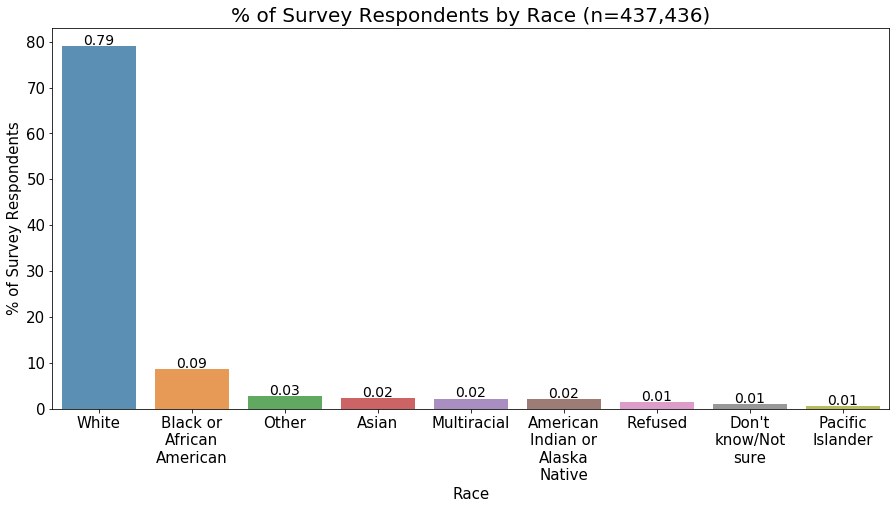

In [34]:
#### Percent Bar Plot: Race---
Race_Viz= brfss2018["x.mrace1"].value_counts(dropna=False, normalize=True)*100
Race_Viz

total = float(sum(Race_Viz.values)) 




plt.figure(figsize=(15,7))
ax=sns.barplot(Race_Viz.index, Race_Viz.values, alpha=0.8)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
    
    
    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in (Race_Viz.index).astype(str)]
plt.xticks(locs,labels,fontsize=15, color='black')



plt.title('% of Survey Respondents by Race (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Race', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()


In [35]:
#### Demographics : Question - Marital Status

### Are you?

print (brfss2018["marital"].value_counts())

print('\n\n\nNon-null row count ',brfss2018['marital'].count())  ### Non-null row count 

print('Total row count including null',len(brfss2018['marital']))  ### Total row count

## Create a dictionary and replace the value
marital = {1:"Married",
           2:"Divorced",
           3:"Widowed",
           4:"Separated",
           5:"Never Married",
           6:"A member of an unmarried couple",
           9: "Refused"}
brfss2018["marital"]=brfss2018["marital"].replace(marital)

## Frequency
c=brfss2018["marital"].value_counts(dropna=False)
p=brfss2018["marital"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])



1.0    223450
5.0     74692
2.0     59900
3.0     51604
6.0     15073
4.0      9458
9.0      3224
Name: marital, dtype: int64



Non-null row count  437401
Total row count including null 437436


,#,%
Married,223450,51.081758
Never Married,74692,17.074955
Divorced,59900,13.693432
Widowed,51604,11.796926
A member of an unmarried couple,15073,3.445761
Separated,9458,2.162145
Refused,3224,0.737022
NaN,35,0.008001


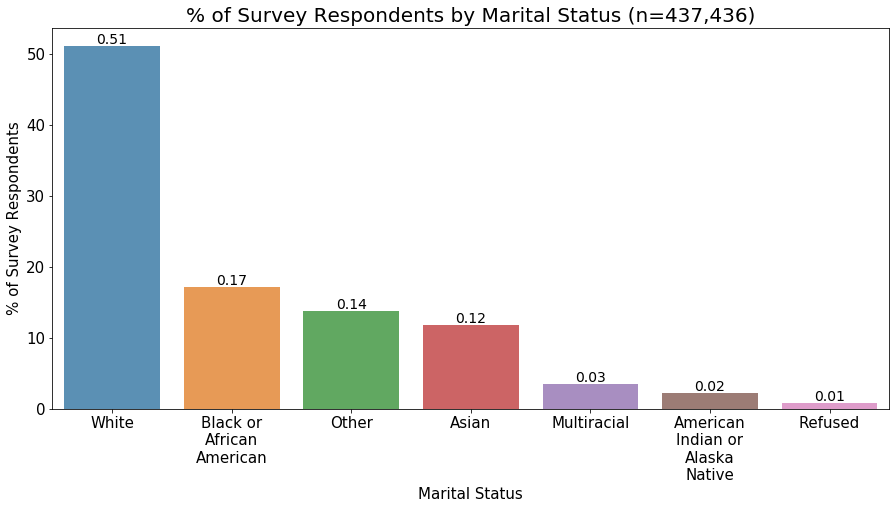

In [36]:
#### Percent Bar Plot: Marital Status---
Marital_Viz= brfss2018["marital"].value_counts(dropna=False, normalize=True)*100
Marital_Viz


total = float(sum(Marital_Viz.values)) 

plt.figure(figsize=(15,7))

ax=sns.barplot(Marital_Viz.index, Marital_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
    

    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in (Race_Viz.index).astype(str)]
plt.xticks(locs,labels,fontsize=15, color='black')


plt.title('% of Survey Respondents by Marital Status (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Marital Status', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()


In [37]:
#### Demographics : Question - Education

### What is the highest grade or year of school you completed?

print (brfss2018["educa"].value_counts())

## Create a dictionary and replace the value
educa = {1:"Never attended school or only attended kindergarten",
           2:"Grades 1 through 8 (Elementary)",
           3:"Grades 9 through 11 (Some high school)",
           4:"Grade 12 or GED (High school graduate)",
           5:"College 1 year to 3 years (Some college or technical school)",
           6:"College 4 years or more (College graduate)",
           9: "Refused"}
brfss2018["educa"]=brfss2018["educa"].replace(educa)

## Frequency
c=brfss2018["educa"].value_counts(dropna=False)
p=brfss2018["educa"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

6.0    164229
5.0    119980
4.0    119038
3.0     21456
2.0     10446
9.0      1587
1.0       666
Name: educa, dtype: int64


,#,%
College 4 years or more (College graduate),164229,37.543549
College 1 year to 3 years (Some college or technical school),119980,27.428012
Grade 12 or GED (High school graduate),119038,27.212667
Grades 9 through 11 (Some high school),21456,4.904946
Grades 1 through 8 (Elementary),10446,2.388006
Refused,1587,0.362796
Never attended school or only attended kindergarten,666,0.152251
NaN,34,0.007773


In [38]:
#### Percent Bar Plot: Education Status---


print (brfss2018["educa"].value_counts())

## Create a dictionary and replace the value
educa = {1:"Never attended school or only attended kindergarten",
           2:"Grades 1 - 8",
           3:"Grades 9 - 11",
           4:"Grade 12 or GED",
           5:"College 1 year to 3 years",
           6:"College 4 years or more",
           9: "Refused"}

brfss2018["educa"]=brfss2018["educa"].replace(educa)


## Frequency
c=brfss2018["educa"].value_counts(dropna=False)
p=brfss2018["educa"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

College 4 years or more (College graduate)                      164229
College 1 year to 3 years (Some college or technical school)    119980
Grade 12 or GED (High school graduate)                          119038
Grades 9 through 11 (Some high school)                           21456
Grades 1 through 8 (Elementary)                                  10446
Refused                                                           1587
Never attended school or only attended kindergarten                666
Name: educa, dtype: int64


,#,%
College 4 years or more (College graduate),164229,37.543549
College 1 year to 3 years (Some college or technical school),119980,27.428012
Grade 12 or GED (High school graduate),119038,27.212667
Grades 9 through 11 (Some high school),21456,4.904946
Grades 1 through 8 (Elementary),10446,2.388006
Refused,1587,0.362796
Never attended school or only attended kindergarten,666,0.152251
NaN,34,0.007773


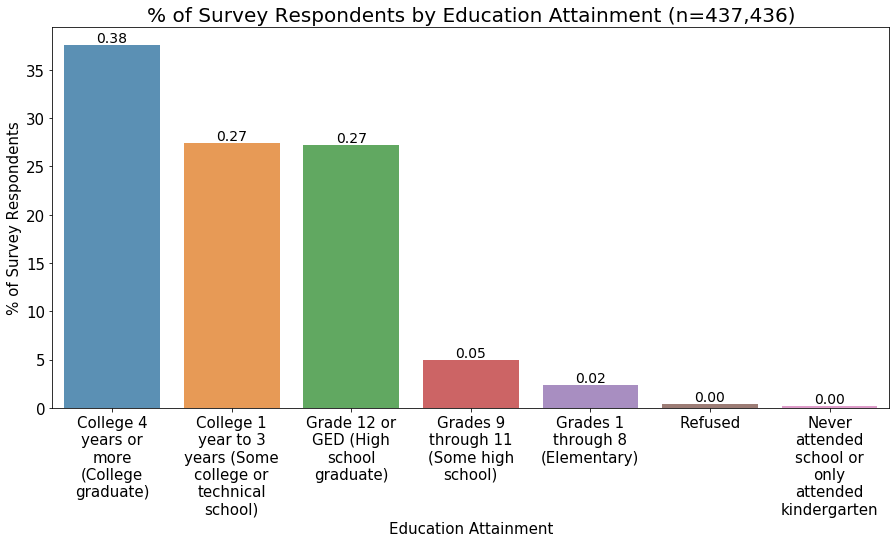

In [39]:
#### Percent Bar Plot: Home Ownership---
Education_Viz= brfss2018["educa"].value_counts(dropna=False, normalize=True)*100
Education_Viz


total = float(sum(Education_Viz.values)) 

plt.figure(figsize=(15,7))


ax=sns.barplot(Education_Viz.index, Education_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    

    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in (Education_Viz.index).astype(str)]
plt.xticks(locs,labels,fontsize=15, color='black')


plt.title('% of Survey Respondents by Education Attainment (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Education Attainment', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [40]:
#### Demographics : Question - Home Ownership

### Do you own or rent your home?

print (brfss2018["renthom1"].value_counts())

## Create a dictionary and replace the value
renthom1 = {1:"Own",
           2:"Rent",
           3:"Other arrangement",
           7:"Don't know / Not sure",
           9: "Refused"}
brfss2018["renthom1"]=brfss2018["renthom1"].replace(renthom1)

## Frequency
c=brfss2018["renthom1"].value_counts(dropna=False)
p=brfss2018["renthom1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

1.0    305546
2.0    107208
3.0     21535
9.0      2131
7.0       978
Name: renthom1, dtype: int64


,#,%
Own,305546,69.849304
Rent,107208,24.508271
Other arrangement,21535,4.923006
Refused,2131,0.487157
Don't know / Not sure,978,0.223576
NaN,38,0.008687


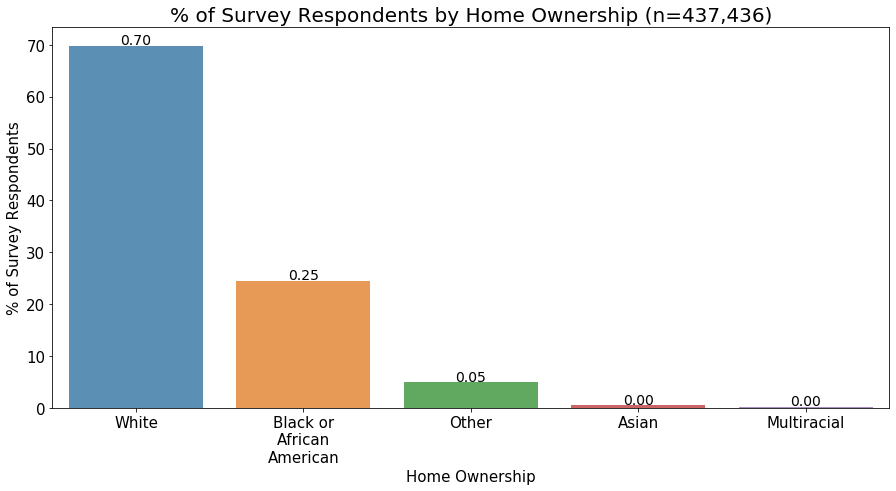

In [41]:
#### Percent Bar Plot: Home Ownership---
HomeOwnership_Viz= brfss2018["renthom1"].value_counts(dropna=False, normalize=True)*100
HomeOwnership_Viz


total = float(sum(HomeOwnership_Viz.values)) 

plt.figure(figsize=(15,7))


ax=sns.barplot(HomeOwnership_Viz.index, HomeOwnership_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    

    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in (Race_Viz.index).astype(str)]
plt.xticks(locs,labels,fontsize=15, color='black')


plt.title('% of Survey Respondents by Home Ownership (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Home Ownership', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [42]:
#### Demographics : Question - Employment

### Are you currently ..........?


print (brfss2018["employ1"].value_counts())

## Create a dictionary and replace the value
employ1 = {1:"Employed for wages",
           2:"Self-employed",
           3:"Out of work 1 year or more",
           4:"Out of work for less than 1 year",
           5:"A Homemaker",
           6:"A Student",
           7:"Retired",
           8:"Unable to work",
           9: "Refused"}
brfss2018["employ1"]=brfss2018["employ1"].replace(employ1)

## Frequency
c=brfss2018["employ1"].value_counts(dropna=False)
p=brfss2018["employ1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

1.0    180094
7.0    130603
2.0     39400
8.0     32629
5.0     21280
6.0     11688
4.0      8507
3.0      8266
9.0      3733
Name: employ1, dtype: int64


,#,%
Employed for wages,180094,41.170365
Retired,130603,29.856482
Self-employed,39400,9.007032
Unable to work,32629,7.459148
A Homemaker,21280,4.864712
A Student,11688,2.671934
Out of work for less than 1 year,8507,1.944742
Out of work 1 year or more,8266,1.889648
Refused,3733,0.853382
NaN,1236,0.282556


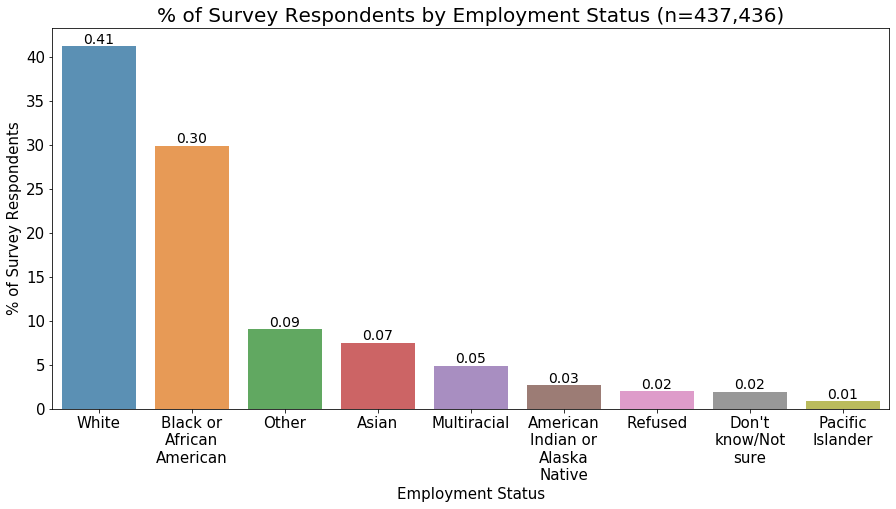

In [43]:
#### Percent Bar Plot: Employment---
Employment_Viz= brfss2018["employ1"].value_counts(dropna=False, normalize=True)*100
Employment_Viz


total = float(sum(Employment_Viz.values)) 

plt.figure(figsize=(15,7))


ax=sns.barplot(Employment_Viz.index, Employment_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 

    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in (Race_Viz.index).astype(str)]
plt.xticks(locs,labels,fontsize=15, color='black')

    
plt.title('% of Survey Respondents by Employment Status (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Employment Status', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [44]:
#### Demographics : Question - Annual Household Income

### Is your annual household income from all sources -----

print (brfss2018["income2"].value_counts())




## Create a dictionary and replace the value
income2 = {1:"Less than $10,000",
           2:"Less than $15,000",
           3:"Less than $20,000",
           4:"Less than $25,000",
           5:"Less than $35,000",
           6:"Less than $50,000",
           7:"Less than $75,000",
           8:"$75,000 or more",
           77:"Don't know / not sure",
           99: "Refused"}
brfss2018["income2"]=brfss2018["income2"].replace(income2)

## Frequency
c=brfss2018["income2"].value_counts(dropna=False)
p=brfss2018["income2"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

8.0     122968
7.0      58098
6.0      49558
99.0     38445
5.0      37830
77.0     33279
4.0      32218
3.0      25850
2.0      18034
1.0      16762
Name: income2, dtype: int64


,#,%
"$75,000 or more",122968,28.111084
"Less than $75,000",58098,13.281486
"Less than $50,000",49558,11.329200
Refused,38445,8.788714
"Less than $35,000",37830,8.648122
Don't know / not sure,33279,7.607741
"Less than $25,000",32218,7.365192
"Less than $20,000",25850,5.909436
"Less than $15,000",18034,4.122660
"Less than $10,000",16762,3.831875


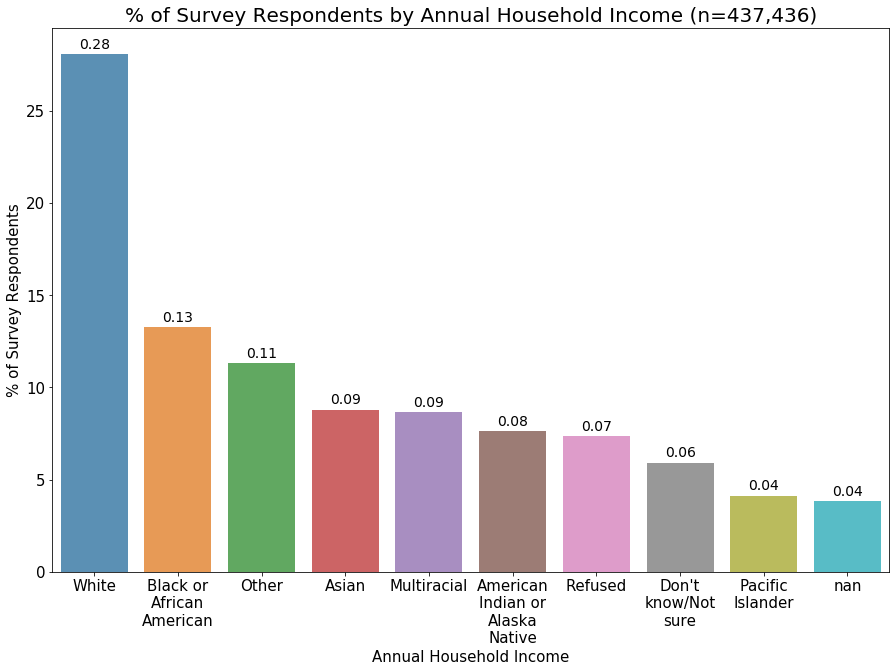

In [45]:
#### Percent Bar Plot: Annual Household Income---
Income_Viz= brfss2018["income2"].value_counts(dropna=False, normalize=True)*100
Income_Viz


total = float(sum(Income_Viz.values)) 

plt.figure(figsize=(15,10))


ax=sns.barplot(Income_Viz.index, Income_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 


    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in (Race_Viz.index).astype(str)]
plt.xticks(locs,labels,fontsize=15, color='black')




plt.title('% of Survey Respondents by Annual Household Income (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Annual Household Income', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [46]:
#### Demographics : Question --- Current Pregnancy

### To your knowledge, are you now pregnant?

print (brfss2018["pregnant"].value_counts())

## Create a dictionary and replace the value
pregnant = {1:"Yes",
       2:"No",
       7:"Don't Know / Not Sure", 
       9: "Refused"}

brfss2018["pregnant"]=brfss2018["pregnant"].replace(pregnant)

## Frequency
c=brfss2018["pregnant"].value_counts(dropna=False)
p=brfss2018["pregnant"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

2.0    75110
1.0     2403
9.0      669
7.0      228
Name: pregnant, dtype: int64


,#,%
NaN,359026,82.075092
No,75110,17.170512
Yes,2403,0.549338
Refused,669,0.152937
Don't Know / Not Sure,228,0.052122


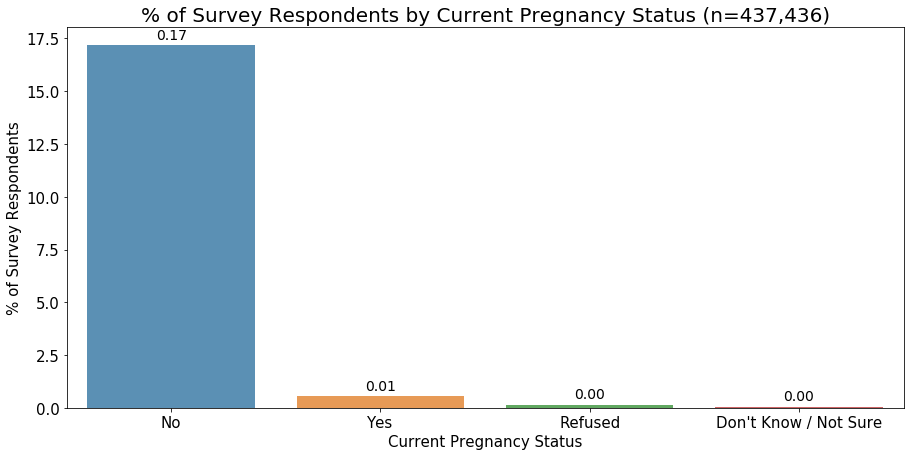

In [47]:
#### Percent Bar Plot: Current Pregnancy Status---
Pregnancy_Viz= brfss2018["pregnant"].value_counts(dropna=False, normalize=True)*100
Pregnancy_Viz


total = float(sum(Pregnancy_Viz.values)) 

plt.figure(figsize=(15,7))

ax=sns.barplot(Pregnancy_Viz.index, Pregnancy_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    



    
plt.title('% of Survey Respondents by Current Pregnancy Status (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Current Pregnancy Status', fontsize=15, color='black')
plt.xticks(rotation=0)
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()



In [48]:
#### Demographics : Question --- Veteran

### Have you ever served on active duty in the United States Armed Forces, either in the regular military or in a 
### national Guard or military reserve unit?

print (brfss2018["veteran3"].value_counts())

## Create a dictionary and replace the value
veteran3 = {1:"Yes",
       2:"No",
       7:"Don't Know / Not Sure", 
       9: "Refused"}

brfss2018["veteran3"]=brfss2018["veteran3"].replace(veteran3)

## Frequency
c=brfss2018["veteran3"].value_counts(dropna=False)
p=brfss2018["veteran3"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

2.0    379966
1.0     56054
9.0       699
7.0       159
Name: veteran3, dtype: int64


,#,%
No,379966,86.862078
Yes,56054,12.814217
Refused,699,0.159795
NaN,558,0.127562
Don't Know / Not Sure,159,0.036348


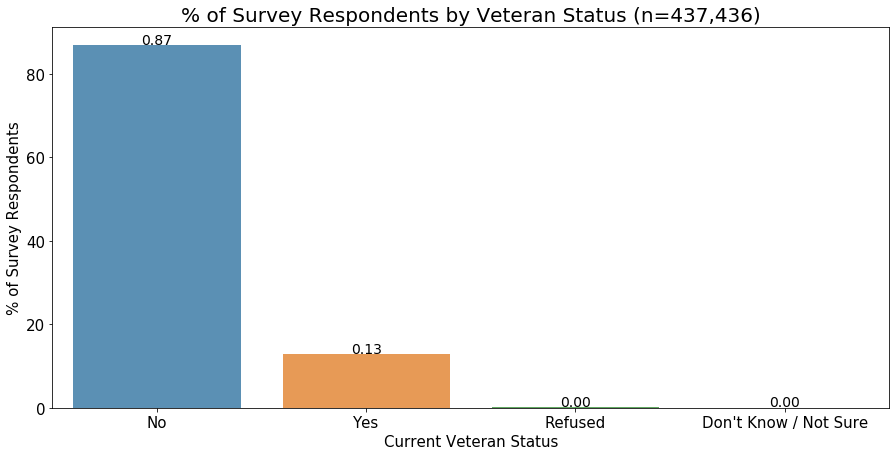

In [49]:
#### Percent Bar Plot: Veteran---
Veteran_Viz= brfss2018["veteran3"].value_counts(dropna=False, normalize=True)*100
Veteran_Viz


total = float(sum(Veteran_Viz.values)) 
plt.figure(figsize=(15,7))

ax=sns.barplot(Veteran_Viz.index, Veteran_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 



    
plt.title('% of Survey Respondents by Veteran Status (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Current Veteran Status', fontsize=15, color='black')
plt.xticks(rotation=0)
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()




In [50]:
#### Demographics : Question --- Residency State

### In what state do you currently live?

print (brfss2018["x.state"].value_counts())



## Create a dictionary and replace the value
state = {1: "Alabama",
            2: "Alaska",
            4: "Arizona",
            5: "Arkansas",
            6: "California",
            8: "Colorado",
            9: "Connecticut",
            10: "Delaware",
            11: "District of Columbia",
            12:"Florida",
            13:"Georgia",
            15:"Hawaii",
            16:"Idaho",
            17:"Illinois",
            18:"Indiana",
            19:"Iowa",
            20:"Kansas",
            21:"Kentucky",
            22:"Louisiana",
            23:"Maine",
            24:"Maryland",
            25:"Massachusetts",
            26:"Michigan",
            27:"Minnesota",
            28:"Mississippi",
            29:"Missouri",
            30:"Montana",
            31:"Nebraska",
            32:"Nevada",
            33:"New Hampshire",
            34:"New Jersey",
            35:"New Mexico",
            36:"New York",
            37:"North Carolina",
            38:"North Dakota",
            39:"Ohio",
            40:"Oklahoma",
            41:"Oregon",
            42:"Pennsylvania",
            44:"Rhode Island",
            45:"South Carolina",
            46:"South Dakota",
            47:"Tennessee",
            48:"Texas",
            49:"Utah",
            50:"Vermont",
            51:"Virginia",
            53:"Washington",
            54:"West Virginia",
            55:"Wisconsin",
            56:"Wyoming",
            66:"Guam",
            72:"Puerto Rico",
            78:"Virgin Island"
           }

brfss2018["x.state"]=brfss2018["x.state"].replace(state)

## Frequency
c=brfss2018["x.state"].value_counts(dropna=False)
p=brfss2018["x.state"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

New York                35767
Maryland                17546
Minnesota               16990
Florida                 15242
Nebraska                14634
Washington              13120
Ohio                    12763
California              11919
Texas                   11217
Maine                   10971
South Carolina          10843
Kansas                  10822
Connecticut             10709
Utah                    10563
Michigan                10322
Virginia                10321
Georgia                  9305
Iowa                     9127
Colorado                 8899
Kentucky                 8548
Arizona                  8089
Hawaii                   7901
Indiana                  7608
South Dakota             7120
New Mexico               6713
Massachusetts            6669
Alabama                  6606
Vermont                  6544
Missouri                 6231
Pennsylvania             6213
Oregon                   5946
Mississippi              5843
New Hampshire            5737
North Dako

,#,%
New York,35767,8.176510
Maryland,17546,4.011101
Minnesota,16990,3.883997
Florida,15242,3.484395
Nebraska,14634,3.345404
Washington,13120,2.999296
Ohio,12763,2.917684
California,11919,2.724741
Texas,11217,2.564261
Maine,10971,2.508024


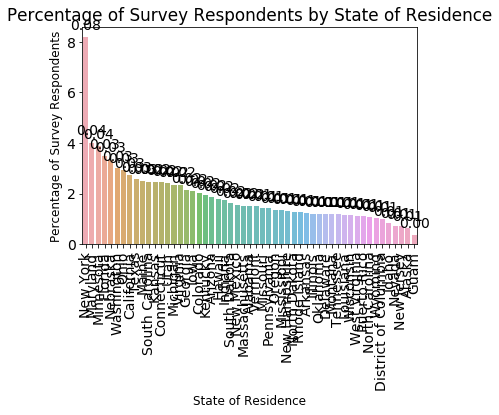

In [51]:
#### Percent Bar Plot: State---
State_Viz= brfss2018["x.state"].value_counts(dropna=False, normalize=True)*100
State_Viz


total = float(sum(State_Viz.values)) 
ax=sns.barplot(State_Viz.index, State_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Percentage of Survey Respondents by State of Residence')
plt.ylabel('Percentage of Survey Respondents', fontsize=12)
plt.xlabel('State of Residence', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [52]:
#### Age categories:

brfss2018['x.age80'].value_counts()


### Function to create the Age categories:

def AgeCategories(brfss2018):
    if brfss2018['x.age80']<=5:
        val="Less than 5 years"
    if brfss2018['x.age80']>=6 and brfss2018['x.age80']<=18:
        val= '6-18 years'
    elif brfss2018['x.age80']>=19 and brfss2018['x.age80']<=35:
        val= '19-35 years'
    elif brfss2018['x.age80']>=36 and brfss2018['x.age80']<=45:
        val= '36-45 years'
    elif brfss2018['x.age80']>=46 and brfss2018['x.age80']<=55:
        val= '46-55 years'
    elif brfss2018['x.age80']>=56 and brfss2018['x.age80']<=65:
        val= '56-65 years'
    elif brfss2018['x.age80']>=66 and brfss2018['x.age80']<=80:
        val= '66-80 years'
    elif brfss2018['x.age80']>80:
        val= 'More than 80 years'
    else:
        val=0
    return val

print(brfss2018.apply(AgeCategories, axis=1))


#Addition of newly created AgeCategories column into the dataframe
brfss2018_AgeCategories=brfss2018.assign(AgeCategory=brfss2018.apply(AgeCategories, axis=1))



0         66-80 years
1         19-35 years
2         66-80 years
3         66-80 years
4         36-45 years
5         66-80 years
6         66-80 years
7         46-55 years
8         56-65 years
9         46-55 years
10        66-80 years
11        56-65 years
12        46-55 years
13        66-80 years
14        46-55 years
15        66-80 years
16        66-80 years
17        66-80 years
18        46-55 years
19        66-80 years
20        36-45 years
21        46-55 years
22        66-80 years
23        56-65 years
24        66-80 years
25        66-80 years
26        56-65 years
27        56-65 years
28        46-55 years
29        66-80 years
             ...     
437406    19-35 years
437407    19-35 years
437408    66-80 years
437409    19-35 years
437410    56-65 years
437411    46-55 years
437412    66-80 years
437413    66-80 years
437414    56-65 years
437415    19-35 years
437416    19-35 years
437417    56-65 years
437418    56-65 years
437419    56-65 years
437420    

In [53]:
brfss2018_AgeCategories['AgeCategory']=brfss2018_AgeCategories['AgeCategory'].astype('category', 
                                             categories=["Less than 5 years",
                                                         "6-18 years",
                                                         "19-35 years",
                                                         "36-45 years",
                                                         "46-55 years",
                                                         "56-65 years",
                                                         "66-80 years",
                                                         "More than 80 years"],
                                             ordered = True)

brfss2018_AgeCategories['AgeCategory'].value_counts()

## Frequency
c=brfss2018_AgeCategories["AgeCategory"].value_counts(dropna=False)
p=brfss2018_AgeCategories["AgeCategory"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

,#,%
66-80 years,142782,32.640661
56-65 years,93263,21.320376
19-35 years,74461,17.022147
46-55 years,70674,16.156421
36-45 years,52663,12.039018
6-18 years,3593,0.821377
More than 80 years,0,0.000000
Less than 5 years,0,0.000000


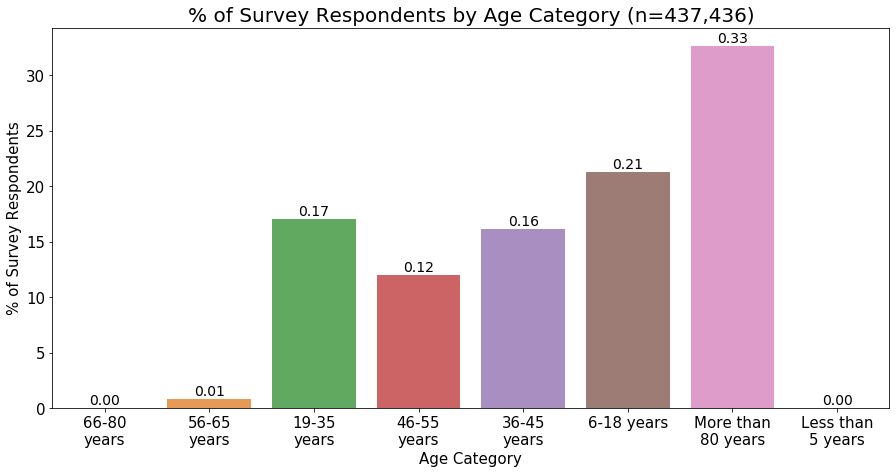

In [54]:
#### Percent Bar Plot: Annual Household Income---
AgeCat_Viz= brfss2018_AgeCategories["AgeCategory"].value_counts(dropna=False, normalize=True)*100
AgeCat_Viz


total = float(sum(AgeCat_Viz.values)) 

plt.figure(figsize=(15,7))


ax=sns.barplot(AgeCat_Viz.index, AgeCat_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 


    

locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 10)) for l in AgeCat_Viz.index]




plt.title('% of Survey Respondents by Age Category (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Age Category', fontsize=15, color='black')


plt.xticks(locs,labels,fontsize=15, color='black',rotation=0)

plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [55]:
AgeCat_Viz.index

CategoricalIndex(['66-80 years', '56-65 years', '19-35 years', '46-55 years',
                  '36-45 years', '6-18 years', 'More than 80 years',
                  'Less than 5 years'],
                 categories=['Less than 5 years', '6-18 years', '19-35 years', '36-45 years', '46-55 years', '56-65 years', '66-80 years', 'More than 80 years'], ordered=True, dtype='category')

In [56]:
### Healthcare Access Core Question 1

### Do you have any kind of Healthcare coverage, including health insurance, prepaid plans such as HMOs, or
### government plans such as Medicare, or Indian Health Service?

print (brfss2018["hlthpln1"].value_counts())

#### Recoding "hlthpln1" Variable

## Create a dictionary and replace the value
hlthpln1 = {1:"Yes",2:"No",7:"Don't Know / Not Sure", 9: "Refused"}
brfss2018["hlthpln1"]=brfss2018["hlthpln1"].replace(hlthpln1)

## Frequency
c=brfss2018["hlthpln1"].value_counts(dropna=False)
p=brfss2018["hlthpln1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

1.0    400029
2.0     35433
7.0      1230
9.0       721
Name: hlthpln1, dtype: int64


,#,%
Yes,400029,91.448578
No,35433,8.100156
Don't Know / Not Sure,1230,0.281184
Refused,721,0.164824
NaN,23,0.005258


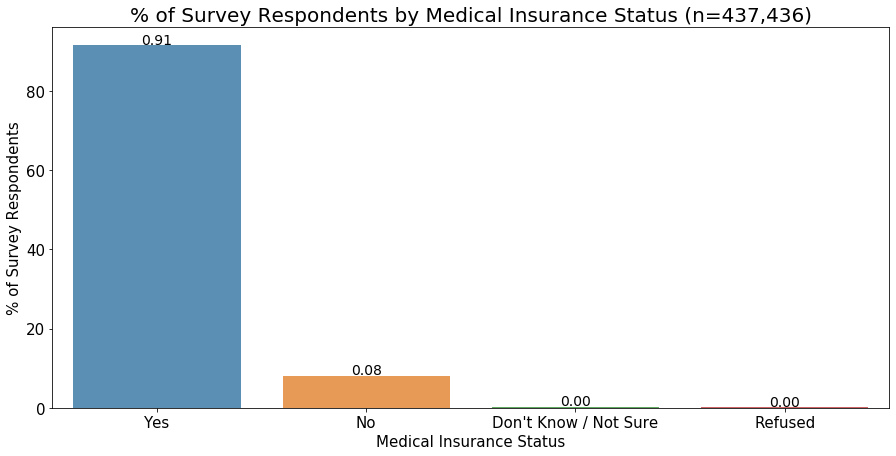

In [57]:
#### Percent Bar Plot: Healthcare Coverage---
Health_Coverage_Viz= brfss2018["hlthpln1"].value_counts(dropna=False, normalize=True)*100
Health_Coverage_Viz


total = float(sum(Health_Coverage_Viz.values)) 

plt.figure(figsize=(15,7))

ax=sns.barplot(Health_Coverage_Viz.index, Health_Coverage_Viz.values, alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 


    
plt.title('% of Survey Respondents by Medical Insurance Status (n=437,436)', fontsize=20, color='black')
plt.ylabel('% of Survey Respondents', fontsize=15, color='black')
plt.xlabel('Medical Insurance Status', fontsize=15, color='black')
plt.xticks(rotation=0)
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()



In [58]:
### Healthcare Access Core Question 2

### Do you have one person you think of as your personal doctor or health care provider?

print (brfss2018["persdoc2"].value_counts(dropna=False))

#### Recoding "persdoc2" Variable

## Create a dictionary and replace the value
persdoc2 = {1:"Yes, only one",2:"More than one", 3:"No", 7:"Don't Know / Not Sure", 9: "Refused"}
brfss2018["persdoc2"]=brfss2018["persdoc2"].replace(persdoc2)

## Frequency
c=brfss2018["persdoc2"].value_counts(dropna=False)
p=brfss2018["persdoc2"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

1.0    327742
3.0     72875
2.0     34044
7.0      1427
NaN       896
9.0       452
Name: persdoc2, dtype: int64


,#,%
"Yes, only one",327742,74.923417
No,72875,16.659580
More than one,34044,7.782624
Don't Know / Not Sure,1427,0.326219
NaN,896,0.204830
Refused,452,0.103329


In [59]:
### Healthcare Access Core Question 3

### Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
print (brfss2018["medcost"].value_counts(dropna=False))

#### Recoding "medcost" Variable

## Create a dictionary and replace the value
medcost = {1:"Yes",2:"No", 7:"Don't Know / Not Sure", 9: "Refused"}
brfss2018["medcost"]=brfss2018["medcost"].replace(medcost)

## Frequency
c=brfss2018["medcost"].value_counts(dropna=False)
p=brfss2018["medcost"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

2.0    390258
1.0     45054
7.0       981
NaN       897
9.0       246
Name: medcost, dtype: int64


,#,%
No,390258,89.214879
Yes,45054,10.299564
Don't Know / Not Sure,981,0.224261
NaN,897,0.205059
Refused,246,0.056237


In [60]:
### Healthcare Access Core Question 4

### About how long has it been since you last visited a doctor for a routine checkup?

print (brfss2018["checkup1"].value_counts(dropna=False))

#### Recoding "checkup1" Variable

## Create a dictionary and replace the value
checkup1 = {1:"Within the past year (anytime less than 12 months ago)",
            2:"Within the past 2 years (1 year but less than 2 years ago)", 
            3:"Within the past 5 years (2 years but less than 5 years ago)",
            4:"5 or more years ago",
            7:"Don't Know / Not Sure", 
            8: "Never",
            9: "Refused"}
brfss2018["checkup1"]=brfss2018["checkup1"].replace(checkup1)

## Frequency
c=brfss2018["checkup1"].value_counts(dropna=False)
p=brfss2018["checkup1"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

1.0    347257
2.0     41245
3.0     21068
4.0     19800
7.0      4477
8.0      2334
NaN       895
9.0       360
Name: checkup1, dtype: int64


,#,%
Within the past year (anytime less than 12 months ago),347257,79.384641
Within the past 2 years (1 year but less than 2 years ago),41245,9.428808
Within the past 5 years (2 years but less than 5 years ago),21068,4.816247
5 or more years ago,19800,4.526376
Don't Know / Not Sure,4477,1.023464
Never,2334,0.533564
NaN,895,0.204601
Refused,360,0.082298


In [61]:
### Finding the list of column names:
brfss2018.columns.values.tolist()

['ID',
 'x.state',
 'fmonth',
 'idate',
 'imonth',
 'iday',
 'iyear',
 'dispcode',
 'seqno',
 'x.psu',
 'ctelenm1',
 'pvtresd1',
 'colghous',
 'statere1',
 'cellfon4',
 'ladult',
 'numadult',
 'nummen',
 'numwomen',
 'safetime',
 'ctelnum1',
 'cellfon5',
 'cadult',
 'pvtresd3',
 'cclghous',
 'cstate1',
 'landline',
 'hhadult',
 'genhlth',
 'physhlth',
 'menthlth',
 'poorhlth',
 'hlthpln1',
 'persdoc2',
 'medcost',
 'checkup1',
 'exerany2',
 'sleptim1',
 'cvdinfr4',
 'cvdcrhd4',
 'cvdstrk3',
 'asthma3',
 'asthnow',
 'chcscncr',
 'chcocncr',
 'chccopd1',
 'havarth3',
 'addepev2',
 'chckdny1',
 'diabete3',
 'diabage2',
 'lastden4',
 'rmvteth4',
 'sex1',
 'marital',
 'educa',
 'renthom1',
 'numhhol3',
 'numphon3',
 'cpdemo1b',
 'veteran3',
 'employ1',
 'children',
 'income2',
 'weight2',
 'height3',
 'pregnant',
 'deaf',
 'blind',
 'decide',
 'diffwalk',
 'diffdres',
 'diffalon',
 'smoke100',
 'smokday2',
 'stopsmk2',
 'lastsmk2',
 'usenow3',
 'alcday5',
 'avedrnk2',
 'drnk3ge5',
 'maxdrnk

In [62]:
brfss2018.groupby("x.state")["hlthpln1"].count().sort_values(ascending=False)[:20]

x.state
New York          35767
Maryland          17546
Minnesota         16990
Florida           15242
Nebraska          14634
Washington        13120
Ohio              12763
California        11919
Texas             11217
Maine             10971
South Carolina    10843
Kansas            10822
Connecticut       10709
Utah              10563
Michigan          10322
Virginia          10321
Georgia            9305
Iowa               9127
Colorado           8899
Kentucky           8548
Name: hlthpln1, dtype: int64

In [63]:
### Cross tab: Sex Vs Veteran Status- Count
pd.crosstab(brfss2018["sex1"],brfss2018["veteran3"],margins=True)

veteran3,Don't Know / Not Sure,No,Refused,Yes,All
sex1,,,,,
Don't Know / Not Sure,3,371,2,54,430
Female,53,233013,193,5389,238648
Male,102,146063,441,50538,197144
Refused,1,519,63,73,656
All,159,379966,699,56054,436878


In [64]:
### Customized Count Pivot table Sex * Healthplan:

brfss2018['sex1'] = brfss2018['sex1'].astype('category', 
                                             categories=['Male', 'Female','Refused',"Don't Know / Not Sure"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
brfss2018.pivot_table(values='ID',
               index=['sex1'],
               columns=['hlthpln1'],
               aggfunc='count').fillna(0).astype(int)

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
sex1,,,,
Male,177336,18980,339,757
Female,221766,16330,350,463
Refused,561,62,32,6
Don't Know / Not Sure,366,61,0,4


In [65]:
### Customized Percentage Count Pivot table Sex * Healthplan:

brfss2018['sex1'] = brfss2018['sex1'].astype('category', 
                                             categories=['Male', 'Female','Refused',"Don't Know / Not Sure"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
brfss2018.pivot_table(values='ID',
               index=['sex1'],
               columns=['hlthpln1'],
               aggfunc=len, margins=True).fillna(0).astype(int).div(len(brfss2018.index)).mul(100).round(2)

hlthpln1,Yes,No,Refused,Don't Know / Not Sure,All
sex1,,,,,
Male,40.54,4.34,0.08,0.17,54.62
Female,50.70,3.73,0.08,0.11,45.13
Refused,0.13,0.01,0.01,0.00,0.15
Don't Know / Not Sure,0.08,0.01,0.00,0.00,0.10
All,91.45,8.10,0.28,0.16,99.99


In [66]:
### Customized Percentage Count Pivot table Sex * Healthplan:

brfss2018['sex1'] = brfss2018['sex1'].astype('category', 
                                             categories=['Male', 'Female','Refused',"Don't Know / Not Sure"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
Result_SexVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['sex1'],
               columns=['hlthpln1'],
               aggfunc=len).fillna(0).astype(int).div(len(brfss2018.index)).mul(100).round(2)
Result_SexVsHealthPlan

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
sex1,,,,
Male,40.54,4.34,0.08,0.17
Female,50.70,3.73,0.08,0.11
Refused,0.13,0.01,0.01,0.00
Don't Know / Not Sure,0.08,0.01,0.00,0.00


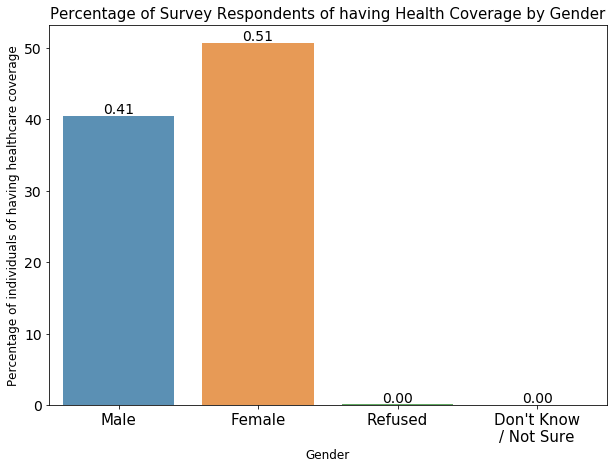

In [67]:
plt.figure(figsize=(10,7))
ax=sns.barplot(Result_SexVsHealthPlan.index, Result_SexVsHealthPlan['Yes'], alpha=0.8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    

locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 10)) for l in Result_SexVsHealthPlan.index]

plt.title('Percentage of Survey Respondents of having Health Coverage by Gender',fontsize=15)
plt.ylabel('Percentage of individuals of having healthcare coverage', fontsize=12)
plt.xlabel('Gender', fontsize=12)

plt.xticks(locs,labels,fontsize=15, color='black',rotation=0)
plt.show()

In [68]:
### Customized Percentage Count Pivot table Employment * Healthplan:

brfss2018['employ1'] = brfss2018['employ1'].astype('category', 
                                             categories=["Employed for wages","Self-employed", 
                                                         "Out of work 1 year or more",
                                                         "Out of work for less than 1 year",
                                                         "A Homemaker",
                                                         "A Student",
                                                         "Retired",
                                                         "Unable to work",
                                                         "Refused"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
EmploymentVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['employ1'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
EmploymentVsHealthPlan

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
employ1,,,,
Employed for wages,0.911069,0.085772,0.000911,0.002249
Self-employed,0.839898,0.155533,0.001624,0.002944
Out of work 1 year or more,0.787684,0.203968,0.002178,0.006170
Out of work for less than 1 year,0.721288,0.268250,0.001411,0.009051
A Homemaker,0.858694,0.137171,0.002021,0.002115
A Student,0.871064,0.108573,0.001882,0.018480
Retired,0.978017,0.019219,0.001608,0.001156
Unable to work,0.918631,0.076037,0.001931,0.003402
Refused,0.821055,0.132333,0.032681,0.013930


In [69]:
EmploymentVsHealthPlan=EmploymentVsHealthPlan.loc[:,['Yes']].sort_values('Yes', ascending = False)
EmploymentVsHealthPlan.columns

CategoricalIndex(['Yes'], categories=['Yes', 'No', 'Refused', 'Don't Know / Not Sure'], ordered=True, name='hlthpln1', dtype='category')

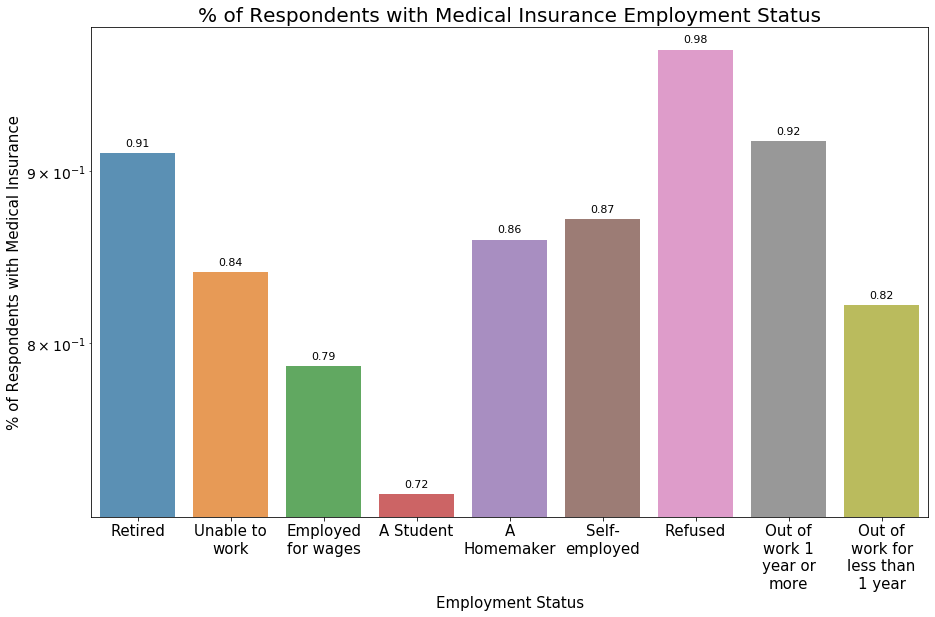

In [70]:
from textwrap import wrap

plt.figure(figsize=(15,9))
ax=sns.barplot(EmploymentVsHealthPlan.index, EmploymentVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
        


labels = [ '\n'.join(wrap(l, 10)) for l in EmploymentVsHealthPlan.index]

plt.title('% of Respondents with Medical Insurance Employment Status', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Employment Status', fontsize=15, color='black')
plt.xticks([0,1,2,3,4,5,6,7,8],labels,fontsize=15, color='black',rotation=0)
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

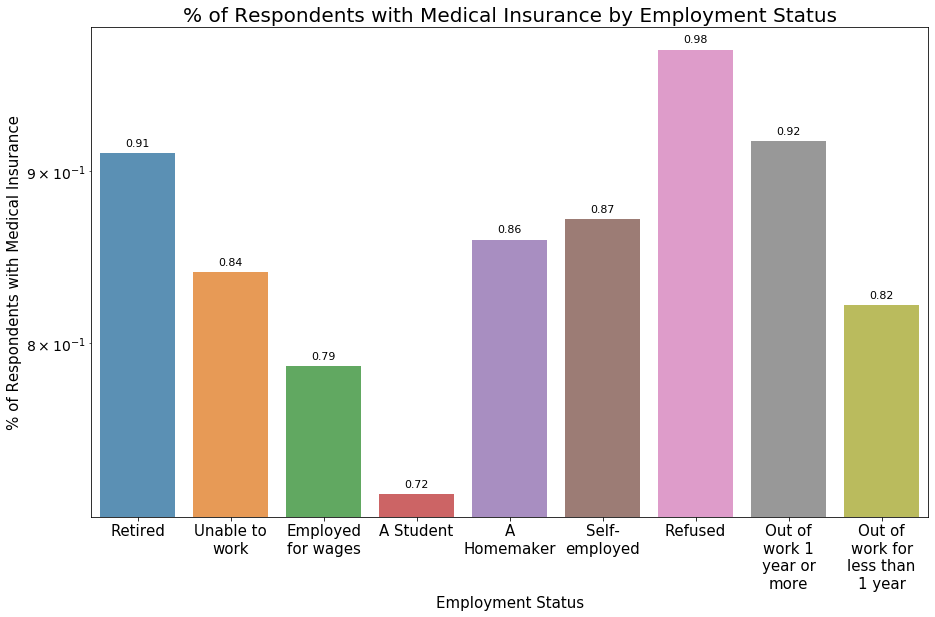

In [71]:
from textwrap import wrap

plt.figure(figsize=(15,9))
ax=sns.barplot(EmploymentVsHealthPlan.index, EmploymentVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
        

locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 10)) for l in EmploymentVsHealthPlan.index]



plt.title('% of Respondents with Medical Insurance by Employment Status', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Employment Status', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black',rotation=0)
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [72]:
print (brfss2018["marital"].value_counts())

## Create a dictionary and replace the value
marital = {1:"Married",
           2:"Divorced",
           3:"Widowed",
           4:"Separated",
           5:"Never Married",
           6:"A member of an unmarried couple",
           9: "Refused"}
brfss2018["marital"]=brfss2018["marital"].replace(marital)

## Frequency
c=brfss2018["marital"].value_counts(dropna=False)
p=brfss2018["marital"].value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['#', '%'])

Married                            223450
Never Married                       74692
Divorced                            59900
Widowed                             51604
A member of an unmarried couple     15073
Separated                            9458
Refused                              3224
Name: marital, dtype: int64


,#,%
Married,223450,51.081758
Never Married,74692,17.074955
Divorced,59900,13.693432
Widowed,51604,11.796926
A member of an unmarried couple,15073,3.445761
Separated,9458,2.162145
Refused,3224,0.737022
NaN,35,0.008001


In [73]:
### Customized Percentage Count Pivot table MArital Status * Healthplan:

brfss2018['marital'] = brfss2018['marital'].astype('category', 
                                             categories=["Married",
                                                         "Divorced",
                                                         "Widowed",
                                                         "Separated",
                                                         "Never Married",
                                                         "A member of an unmarried couple",
                                                         "Refused"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
MaritalStatusVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['marital'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
MaritalStatusVsHealthPlan

/Users/prasadbhoite/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


hlthpln1,Yes,No,Refused,Don't Know / Not Sure
marital,,,,
Married,0.941101,0.056599,0.001132,0.001168
Divorced,0.903172,0.093689,0.001336,0.001803
Widowed,0.962251,0.033641,0.002054,0.002054
Separated,0.814231,0.180799,0.001586,0.003383
Never Married,0.849033,0.140470,0.002048,0.008448
A member of an unmarried couple,0.802295,0.191999,0.001261,0.004445
Refused,0.857940,0.104839,0.029467,0.007754


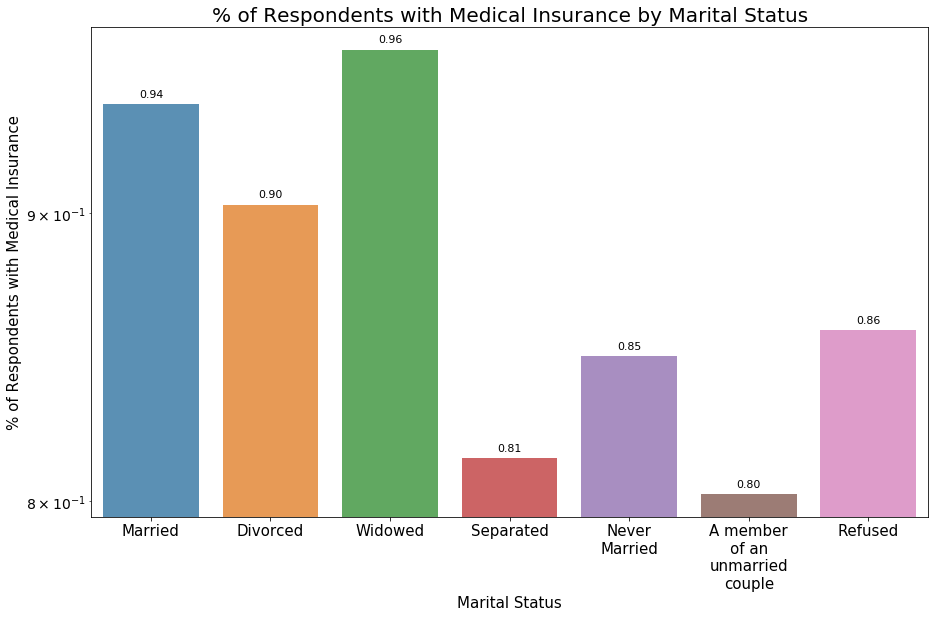

In [74]:
plt.figure(figsize=(15,9))
ax=sns.barplot(MaritalStatusVsHealthPlan.index, MaritalStatusVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')


locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 10)) for l in MaritalStatusVsHealthPlan.index]



plt.title('% of Respondents with Medical Insurance by Marital Status', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Marital Status', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()


In [75]:
### Customized Percentage Count Pivot table Race * Healthplan:

brfss2018['x.mrace1'] = brfss2018['x.mrace1'].astype('category', 
                                             categories=["White",
                                                         "Black or African American",
                                                         "American Indian or Alaska Native",
                                                         "Asian",
                                                         "Pacific Islander",
                                                         "Other",
                                                         "No Additional Choices",
                                                         "Don't know/Not sure",
                                                         "Refused"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
RaceVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['x.mrace1'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
RaceVsHealthPlan

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
x.mrace1,,,,
White,0.930072,0.066295,0.001331,0.002303
Black or African American,0.880540,0.113570,0.002271,0.003618
American Indian or Alaska Native,0.879641,0.113569,0.001862,0.004928
Asian,0.900955,0.091343,0.001365,0.006337
Pacific Islander,0.826901,0.166221,0.001146,0.005732
Other,0.775621,0.218796,0.001632,0.003952
Don't know/Not sure,0.618152,0.370327,0.001646,0.009875
Refused,0.863343,0.116685,0.015568,0.004403


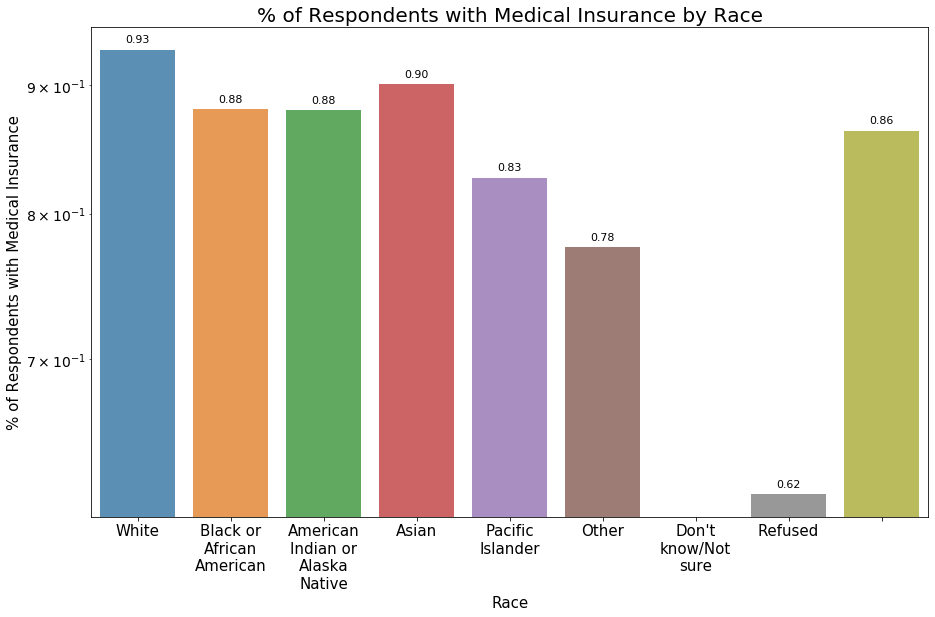

In [76]:
plt.figure(figsize=(15,9))
ax=sns.barplot(RaceVsHealthPlan.index, RaceVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')

        
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 10)) for l in RaceVsHealthPlan.index]



plt.title('% of Respondents with Medical Insurance by Race', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Race', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()



In [77]:
### Customized Percentage Count Pivot table Educational Attainment * Healthplan:

brfss2018['educa'] = brfss2018['educa'].astype('category', 
                                             categories=["Never attended school or only attended kindergarten",
                                                         "Grades 1 through 8 (Elementary)",
                                                         "Grades 9 through 11 (Some high school)",
                                                         "Grade 12 or GED (High school graduate)",
                                                         "College 1 year to 3 years (Some college or technical school)",
                                                         "College 4 years or more (College graduate)",
                                                         "Refused"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
EducationVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['educa'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
EducationVsHealthPlan

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
educa,,,,
Never attended school or only attended kindergarten,0.621622,0.372372,0.004505,0.001502
Grades 1 through 8 (Elementary),0.710033,0.282213,0.002202,0.005552
Grades 9 through 11 (Some high school),0.800336,0.190856,0.002330,0.006478
Grade 12 or GED (High school graduate),0.883239,0.110091,0.002243,0.004427
College 1 year to 3 years (Some college or technical school),0.922529,0.073554,0.001309,0.002609
College 4 years or more (College graduate),0.961505,0.036528,0.000926,0.001041
Refused,0.811594,0.131695,0.043478,0.013233


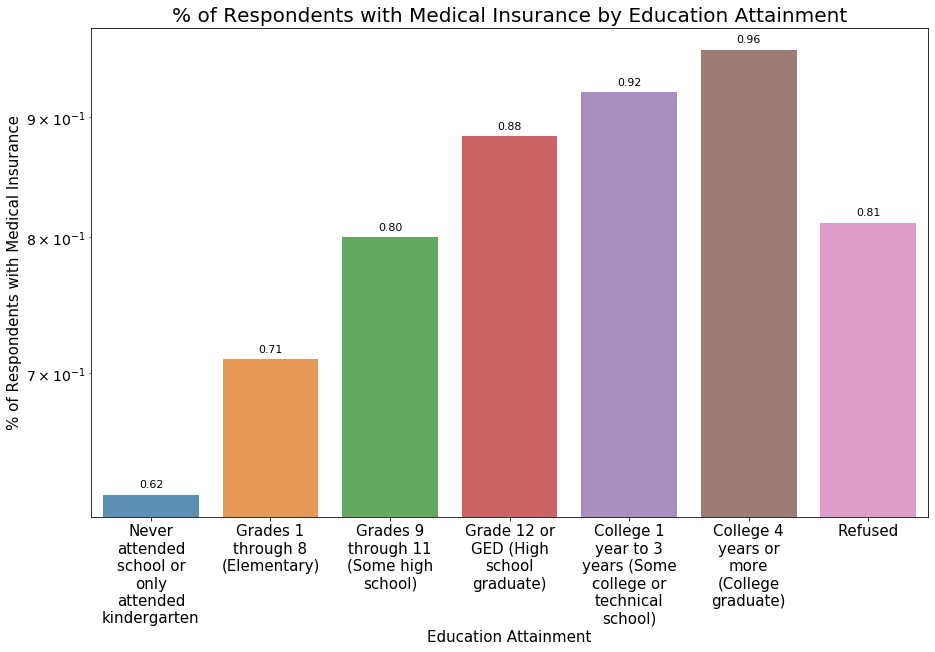

In [78]:
plt.figure(figsize=(15,9))
ax=sns.barplot(EducationVsHealthPlan.index, EducationVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
        
        
        
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in EducationVsHealthPlan.index]



plt.title('% of Respondents with Medical Insurance by Education Attainment', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Education Attainment', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()




In [79]:
### Customized Percentage Count Pivot table HomeOwnership * Healthplan:

brfss2018['renthom1'] = brfss2018['renthom1'].astype('category', 
                                             categories=["Own",
                                                         "Rent",
                                                         "Other arrangement",
                                                         "Don't know / Not sure",
                                                         "Refused"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
HomeOwnershipVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['renthom1'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
HomeOwnershipVsHealthPlan

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
renthom1,,,,
Own,0.948312,0.049233,0.001136,0.001319
Rent,0.835469,0.158589,0.001595,0.004347
Other arrangement,0.839146,0.143580,0.002972,0.014302
Don't know / Not sure,0.820041,0.142127,0.005112,0.032720
Refused,0.855467,0.071797,0.062881,0.009855


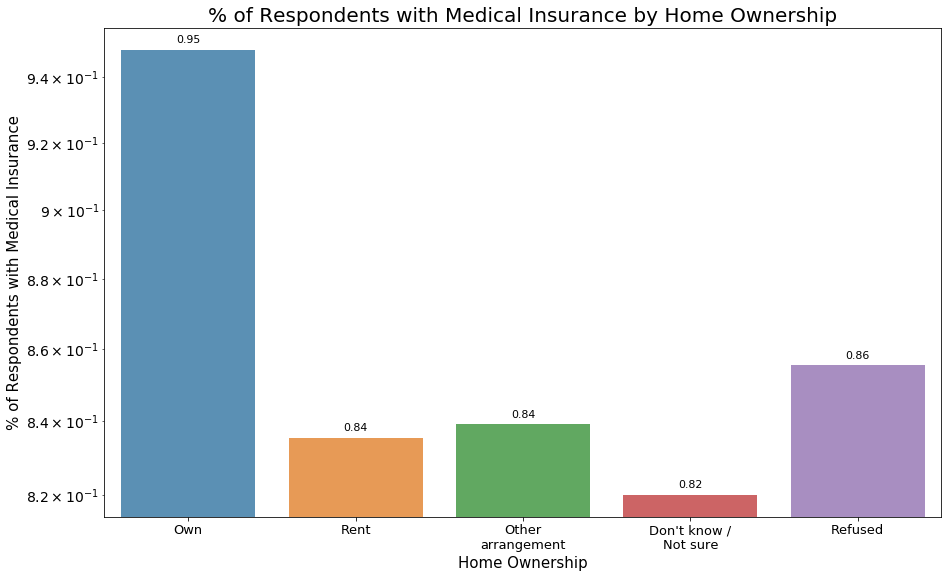

In [80]:
plt.figure(figsize=(15,9))
ax=sns.barplot(HomeOwnershipVsHealthPlan.index, HomeOwnershipVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
       
    
    
    
    

    
    
    
    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in HomeOwnershipVsHealthPlan.index]



plt.title('% of Respondents with Medical Insurance by Home Ownership', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Home Ownership', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=13, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()



In [81]:
### Customized Percentage Count Pivot table Annual Household Income * Healthplan:

brfss2018['income2'] = brfss2018['income2'].astype('category', 
                                             categories=["Less than $10,000",
                                                         "Less than $15,000",
                                                         "Less than $20,000",
                                                         "Less than $25,000",
                                                         "Less than $35,000",
                                                         "Less than $50,000",
                                                         "Less than $75,000",
                                                         "$75,000 or more",
                                                         "Don't know / not sure",
                                                         "Refused"],
                                             ordered = True)

brfss2018['hlthpln1']=brfss2018['hlthpln1'].astype('category', 
                                             categories=['Yes', 'No','Refused',"Don't Know / Not Sure"],
                                                  ordered = True)
AnnualHHIncomeVsHealthPlan=brfss2018.pivot_table(values='ID',
               index=['income2'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
AnnualHHIncomeVsHealthPlan

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
income2,,,,
"Less than $10,000",0.823042,0.170217,0.001492,0.005250
"Less than $15,000",0.867465,0.128209,0.001553,0.002773
"Less than $20,000",0.844011,0.152159,0.000967,0.002863
"Less than $25,000",0.858899,0.137780,0.000807,0.002514
"Less than $35,000",0.885987,0.111290,0.000555,0.002168
"Less than $50,000",0.915693,0.082027,0.000585,0.001695
"Less than $75,000",0.945575,0.052566,0.000568,0.001291
"$75,000 or more",0.970341,0.028455,0.000276,0.000927
Don't know / not sure,0.850449,0.133472,0.002314,0.013765


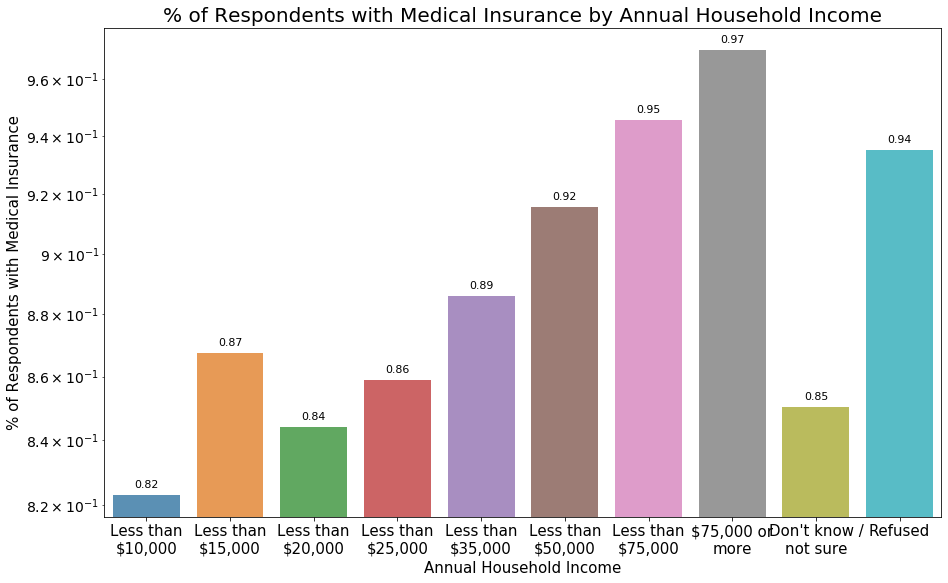

In [82]:
plt.figure(figsize=(15,9))
ax=sns.barplot(AnnualHHIncomeVsHealthPlan.index, AnnualHHIncomeVsHealthPlan['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
        

        
        
    
    
    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in AnnualHHIncomeVsHealthPlan.index]



plt.title('% of Respondents with Medical Insurance by Annual Household Income', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Annual Household Income', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()


In [83]:
#### Age categories:

brfss2018['x.age80'].value_counts()


### Function to create the Age categories:

def AgeCategories(brfss2018):
    if brfss2018['x.age80']<=5:
        val="Less than 5 years"
    if brfss2018['x.age80']>=6 and brfss2018['x.age80']<=18:
        val= '6-18 years'
    elif brfss2018['x.age80']>=19 and brfss2018['x.age80']<=35:
        val= '19-35 years'
    elif brfss2018['x.age80']>=36 and brfss2018['x.age80']<=45:
        val= '36-45 years'
    elif brfss2018['x.age80']>=46 and brfss2018['x.age80']<=55:
        val= '46-55 years'
    elif brfss2018['x.age80']>=56 and brfss2018['x.age80']<=65:
        val= '56-65 years'
    elif brfss2018['x.age80']>=66 and brfss2018['x.age80']<=80:
        val= '66-80 years'
    elif brfss2018['x.age80']>80:
        val= 'More than 80 years'
    else:
        val=0
    return val

print(brfss2018.apply(AgeCategories, axis=1))


#Addition of newly created AgeCategories column into the dataframe
brfss2018_AgeCategories=brfss2018.assign(AgeCategory=brfss2018.apply(AgeCategories, axis=1))


0         66-80 years
1         19-35 years
2         66-80 years
3         66-80 years
4         36-45 years
5         66-80 years
6         66-80 years
7         46-55 years
8         56-65 years
9         46-55 years
10        66-80 years
11        56-65 years
12        46-55 years
13        66-80 years
14        46-55 years
15        66-80 years
16        66-80 years
17        66-80 years
18        46-55 years
19        66-80 years
20        36-45 years
21        46-55 years
22        66-80 years
23        56-65 years
24        66-80 years
25        66-80 years
26        56-65 years
27        56-65 years
28        46-55 years
29        66-80 years
             ...     
437406    19-35 years
437407    19-35 years
437408    66-80 years
437409    19-35 years
437410    56-65 years
437411    46-55 years
437412    66-80 years
437413    66-80 years
437414    56-65 years
437415    19-35 years
437416    19-35 years
437417    56-65 years
437418    56-65 years
437419    56-65 years
437420    

In [84]:
brfss2018_AgeCategories['AgeCategory']=brfss2018_AgeCategories['AgeCategory'].astype('category', 
                                             categories=["Less than 5 years",
                                                         "6-18 years",
                                                         "19-35 years",
                                                         "36-45 years",
                                                         "46-55 years",
                                                         "56-65 years",
                                                         "66-80 years",
                                                         "More than 80 years"],
                                             ordered = True)

brfss2018_AgeCategories['AgeCategory'].value_counts()



66-80 years           142782
56-65 years            93263
19-35 years            74461
46-55 years            70674
36-45 years            52663
6-18 years              3593
More than 80 years         0
Less than 5 years          0
Name: AgeCategory, dtype: int64

In [85]:
brfss2018_AgeCategories=brfss2018_AgeCategories.pivot_table(values='ID',
               index=['AgeCategory'],
               columns=['hlthpln1'],
               aggfunc=len).astype(int).apply(lambda r: r/r.sum(), axis=1)
brfss2018_AgeCategories

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
AgeCategory,,,,
6-18 years,0.803228,0.144169,0.003340,0.049262
19-35 years,0.831576,0.160232,0.001410,0.006782
36-45 years,0.860509,0.136642,0.001101,0.001747
46-55 years,0.898052,0.098197,0.002010,0.001741
56-65 years,0.926153,0.070673,0.001673,0.001501
66-80 years,0.981090,0.015821,0.001737,0.001352


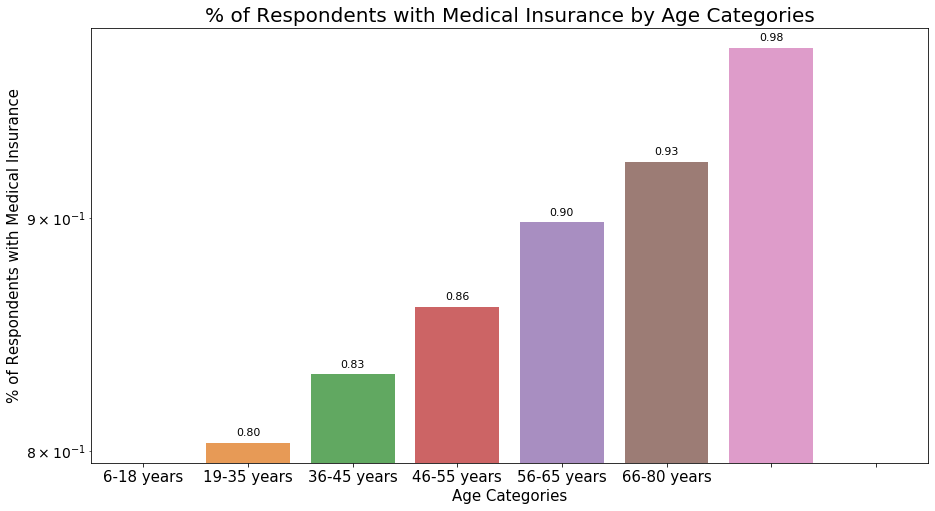

In [86]:
plt.figure(figsize=(15,8))
ax=sns.barplot(brfss2018_AgeCategories.index, brfss2018_AgeCategories['Yes'], alpha=0.8)
ax.set_yscale("log")

## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')

        
        
    
    
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l, 12)) for l in brfss2018_AgeCategories.index]



plt.title('% of Respondents with Medical Insurance by Age Categories', fontsize=20, color='black')
plt.ylabel('% of Respondents with Medical Insurance', fontsize=15, color='black')
plt.xlabel('Age Categories', fontsize=15, color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [90]:
#### State Overall RAnking:

pivot=brfss2018.pivot_table(values='ID',
               index=['x.state'],
               columns=['hlthpln1'],
               aggfunc=len).fillna(0).astype(int).apply(lambda r: r/r.sum(), axis=1)
result = pivot.sort_values(('Yes'), ascending=False)[:10]
result


result=pd.DataFrame(pivot)
result

result.columns=result.columns.astype('str')
MedInsurance_Rate_State=result.reset_index()
MedInsurance_Rate_State

MedInsurance_Rate_State.sort_values(('Yes'), ascending=False).reset_index(drop=True)

hlthpln1,x.state,Yes,No,Refused,Don't Know / Not Sure
0,District of Columbia,0.958836,0.036388,0.001819,0.002957
1,Massachusetts,0.949318,0.045584,0.001200,0.003899
2,Connecticut,0.948641,0.046970,0.001681,0.002708
3,Maryland,0.947851,0.047817,0.002337,0.001995
4,New Hampshire,0.947534,0.050723,0.001220,0.000523
5,Vermont,0.947127,0.049511,0.001834,0.001528
6,Rhode Island,0.947030,0.049759,0.000892,0.002319
7,Ohio,0.945937,0.049832,0.001489,0.002742
8,Kentucky,0.944080,0.052761,0.001404,0.001755
9,North Dakota,0.943614,0.054073,0.001245,0.001067


In [91]:
MedInsurance_Rate_State['Yes'].mean()

0.9134881673393379

In [92]:
MedInsurance_Rate_State['Yes'].median()

0.91478093403948

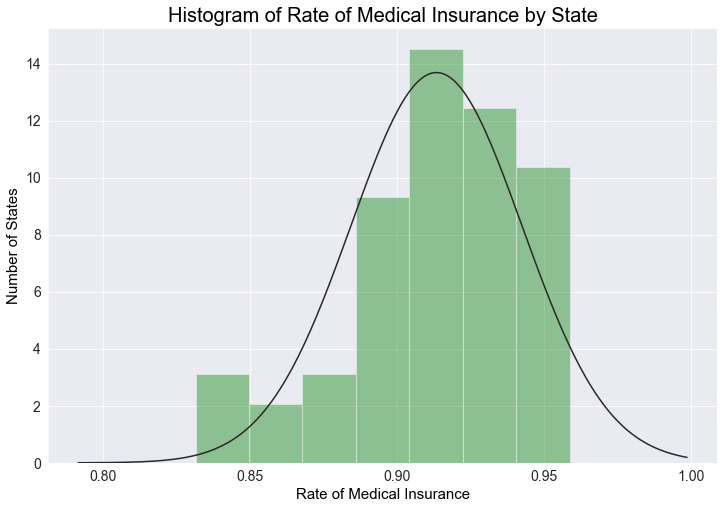

In [94]:
#### Histogram Plotting:

state_Med_InsuranceRate= MedInsurance_Rate_State[['x.state','Yes']]

from scipy.stats import norm
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.distplot(state_Med_InsuranceRate['Yes'], fit=norm, kde=False,color="g")

plt.title('Histogram of Rate of Medical Insurance by State', fontsize=20, color='black')
plt.ylabel('Number of States', fontsize=15, color='black')
plt.xlabel('Rate of Medical Insurance', fontsize=15, color='black')

plt.rcParams.update({'font.size': 14})
plt.show()

In [87]:
### Top 10 states with the highest insurance rates-- row percentages:
### Apply Filters:



pivot=brfss2018.pivot_table(values='ID',
               index=['x.state'],
               columns=['hlthpln1'],
               aggfunc=len).fillna(0).astype(int).apply(lambda r: r/r.sum(), axis=1)
result = pivot.sort_values(('Yes'), ascending=False)[:10]
result

hlthpln1,Yes,No,Refused,Don't Know / Not Sure
x.state,,,,
District of Columbia,0.958836,0.036388,0.001819,0.002957
Massachusetts,0.949318,0.045584,0.001200,0.003899
Connecticut,0.948641,0.046970,0.001681,0.002708
Maryland,0.947851,0.047817,0.002337,0.001995
New Hampshire,0.947534,0.050723,0.001220,0.000523
Vermont,0.947127,0.049511,0.001834,0.001528
Rhode Island,0.947030,0.049759,0.000892,0.002319
Ohio,0.945937,0.049832,0.001489,0.002742
Kentucky,0.944080,0.052761,0.001404,0.001755


hlthpln1                   Yes
State                         
District of Columbia  0.958836
Massachusetts         0.949318
Connecticut           0.948641
Maryland              0.947851
New Hampshire         0.947534
Vermont               0.947127
Rhode Island          0.947030
Ohio                  0.945937
Kentucky              0.944080
North Dakota          0.943614


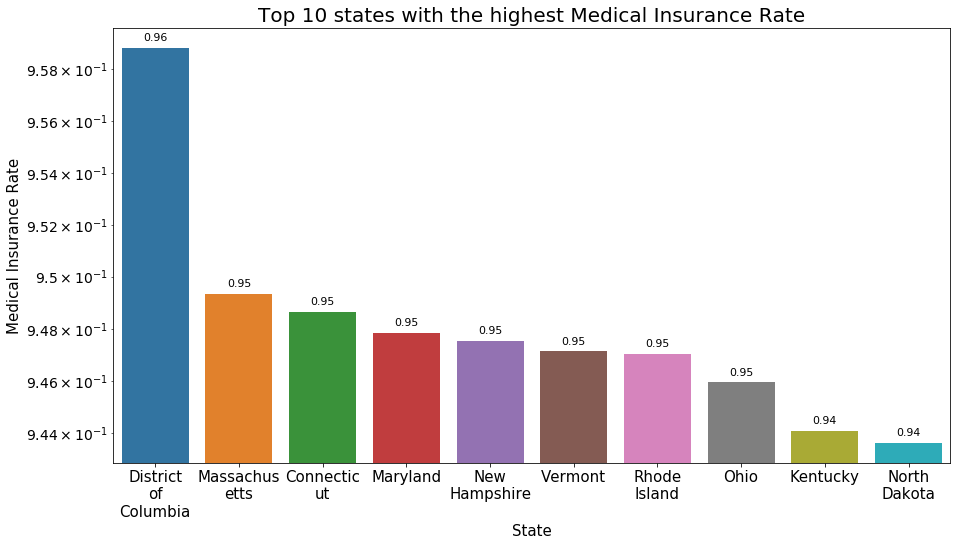

In [88]:
### Converting the pivot table result into DataFrame, changing the index name and substting the data:

result=pd.DataFrame(result)

result.index.names = ['State']

result_Top10_insurance_States = result.loc[:,['Yes']]
print(result_Top10_insurance_States)

### Data visualization: Bar Plot-- Top 10 states with the highest Insurance Rates:
plt.figure(figsize=(15,8))
ax=sns.barplot(x=result_Top10_insurance_States.index, y="Yes", data=result_Top10_insurance_States)
ax.set_yscale("log")


   
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l,9)) for l in result_Top10_insurance_States.index]



## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')


plt.title("Top 10 states with the highest Medical Insurance Rate", fontsize=20,color='black')
plt.xlabel("State", fontsize=15,color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.ylabel('Medical Insurance Rate', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

hlthpln1             Yes        No   Refused  Don't Know / Not Sure
x.state                                                            
Guam            0.831509  0.159976  0.001217               0.007299
Texas           0.838459  0.155300  0.002675               0.003566
Georgia         0.846319  0.148952  0.002364               0.002364
Florida         0.860517  0.133316  0.002690               0.003477
North Carolina  0.864876  0.133432  0.000423               0.001269
Mississippi     0.874208  0.123909  0.000685               0.001198
California      0.884218  0.112090  0.000336               0.003356
Idaho           0.885281  0.109037  0.001894               0.003788
Utah            0.887721  0.106883  0.001799               0.003597
Illinois        0.890837  0.105581  0.001131               0.002451


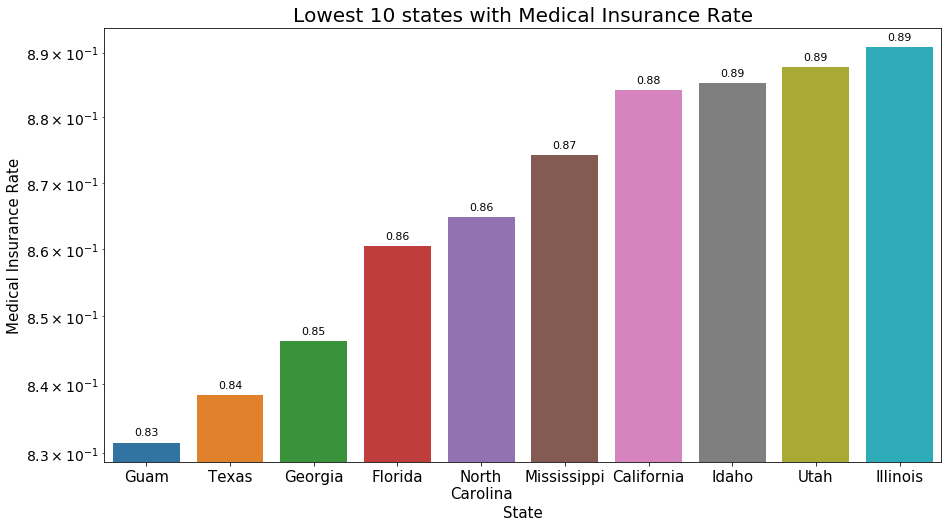

In [89]:
### Lowest 10 states with the Lowest insurance rates-- row percentages:
### Apply Filters:



df=brfss2018.pivot_table(values='ID',
               index=['x.state'],
               columns=['hlthpln1'],
               aggfunc=len).fillna(0).astype(int).apply(lambda r: r/r.sum(), axis=1)


Lowest_10_states = df.sort_values(('Yes'), ascending=True)[:10]
print(Lowest_10_states)


### Data visualization: Bar Plot
plt.figure(figsize=(15,8))
ax=sns.barplot(x=Lowest_10_states.index, y="Yes", data=Lowest_10_states)
ax.set_yscale("log")



## Following code will take bring the values on bar chart
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')

   
locs, lab=plt.xticks()
labels = [ '\n'.join(wrap(l,11)) for l in Lowest_10_states.index]





plt.title("Lowest 10 states with Medical Insurance Rate", fontsize=20,color='black')
plt.xlabel("State", fontsize=15,color='black')
plt.xticks(locs,labels,fontsize=15, color='black')
plt.ylabel('Medical Insurance Rate', fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.rcParams.update({'font.size': 14})
plt.show()

In [386]:
### Read the dataset

State_Avg_Unemployment_Rate=pd.read_excel('State_Avg_Unemployment_Rate.xlsx')
State_Avg_Unemployment_Rate


### Merging the Unemployment Rate file into brfss2018 file

brfss2018_Unemployment_Rate=brfss2018.merge(State_Avg_Unemployment_Rate, 
                                            how='left', 
                                            left_on='x.state', 
                                            right_on='State')
brfss2018_Unemployment_Rate

,ID,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.hfob3yr,x.fs5yr,x.fobtfs,x.crcrec,x.aidtst3,Date,Month_Year,Series ID,Value,State
0,1,Alabama,1,1052018,1,5,2018,1100,2018000001,2018000001,...,NaN,NaN,NaN,NaN,2.0,2018-01-05,Jan-2018,LAUST010000000000003,3.93,Alabama
1,2,Alabama,1,1122018,1,12,2018,1100,2018000002,2018000002,...,NaN,NaN,NaN,NaN,2.0,2018-01-12,Jan-2018,LAUST010000000000003,3.93,Alabama
2,3,Alabama,1,1082018,1,8,2018,1100,2018000003,2018000003,...,NaN,NaN,NaN,NaN,2.0,2018-01-08,Jan-2018,LAUST010000000000003,3.93,Alabama
3,4,Alabama,1,1032018,1,3,2018,1100,2018000004,2018000004,...,2.0,2.0,2.0,2.0,2.0,2018-01-03,Jan-2018,LAUST010000000000003,3.93,Alabama
4,5,Alabama,1,1122018,1,12,2018,1100,2018000005,2018000005,...,NaN,NaN,NaN,NaN,2.0,2018-01-12,Jan-2018,LAUST010000000000003,3.93,Alabama
5,6,Alabama,1,1112018,1,11,2018,1100,2018000006,2018000006,...,NaN,NaN,NaN,NaN,2.0,2018-01-11,Jan-2018,LAUST010000000000003,3.93,Alabama
6,7,Alabama,1,1102018,1,10,2018,1100,2018000007,2018000007,...,NaN,NaN,NaN,NaN,2.0,2018-01-10,Jan-2018,LAUST010000000000003,3.93,Alabama
7,8,Alabama,1,1132018,1,13,2018,1100,2018000008,2018000008,...,NaN,NaN,NaN,NaN,2.0,2018-01-13,Jan-2018,LAUST010000000000003,3.93,Alabama
8,9,Alabama,1,1092018,1,9,2018,1100,2018000009,2018000009,...,2.0,2.0,2.0,1.0,2.0,2018-01-09,Jan-2018,LAUST010000000000003,3.93,Alabama
9,10,Alabama,1,1102018,1,10,2018,1100,2018000010,2018000010,...,NaN,NaN,NaN,NaN,1.0,2018-01-10,Jan-2018,LAUST010000000000003,3.93,Alabama


In [387]:
### Read the dataset

brfss2018=pd.read_csv('brfss2018.csv')
brfss2018

/Users/prasadbhoite/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.mam5022,x.rfpap34,x.rfpsa22,x.rfblds3,x.col10yr,x.hfob3yr,x.fs5yr,x.fobtfs,x.crcrec,x.aidtst3
0,1,1,1,1052018,1,5,2018,1100,2018000001,2018000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,2,1,1,1122018,1,12,2018,1100,2018000002,2018000002,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,3,1,1,1082018,1,8,2018,1100,2018000003,2018000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,4,1,1,1032018,1,3,2018,1100,2018000004,2018000004,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,1,1,1122018,1,12,2018,1100,2018000005,2018000005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5,6,1,1,1112018,1,11,2018,1100,2018000006,2018000006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,7,1,1,1102018,1,10,2018,1100,2018000007,2018000007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7,8,1,1,1132018,1,13,2018,1100,2018000008,2018000008,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8,9,1,1,1092018,1,9,2018,1100,2018000009,2018000009,...,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
9,10,1,1,1102018,1,10,2018,1100,2018000010,2018000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [388]:
### Renaming the first column:
brfss2018.rename(columns={"Unnamed: 0":"ID"}, inplace=True)
brfss2018

,ID,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.mam5022,x.rfpap34,x.rfpsa22,x.rfblds3,x.col10yr,x.hfob3yr,x.fs5yr,x.fobtfs,x.crcrec,x.aidtst3
0,1,1,1,1052018,1,5,2018,1100,2018000001,2018000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,2,1,1,1122018,1,12,2018,1100,2018000002,2018000002,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,3,1,1,1082018,1,8,2018,1100,2018000003,2018000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,4,1,1,1032018,1,3,2018,1100,2018000004,2018000004,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,1,1,1122018,1,12,2018,1100,2018000005,2018000005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5,6,1,1,1112018,1,11,2018,1100,2018000006,2018000006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,7,1,1,1102018,1,10,2018,1100,2018000007,2018000007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7,8,1,1,1132018,1,13,2018,1100,2018000008,2018000008,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8,9,1,1,1092018,1,9,2018,1100,2018000009,2018000009,...,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
9,10,1,1,1102018,1,10,2018,1100,2018000010,2018000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [389]:
brfss2018[["ID", "imonth", "iday", "iyear", "x.state", "sex1", "marital", "educa", "renthom1",
          "numhhol3", "numphon3", "cpdemo1b",  "veteran3", "employ1", "children", "income2",
          "weight2", "height3", "pregnant", "x.hispanc", "x.race", "x.hispanc", "x.race", "cstate1","hlthpln1"]]

,ID,imonth,iday,iyear,x.state,sex1,marital,educa,renthom1,numhhol3,...,income2,weight2,height3,pregnant,x.hispanc,x.race,x.hispanc,x.race,cstate1,hlthpln1
0,1,1,5,2018,1,2,3.0,6.0,1.0,2.0,...,6.0,130.0,504.0,NaN,2,1.0,2,1.0,NaN,1.0
1,2,1,12,2018,1,2,5.0,6.0,2.0,2.0,...,4.0,200.0,505.0,2.0,2,2.0,2,2.0,NaN,2.0
2,3,1,8,2018,1,2,3.0,4.0,1.0,2.0,...,3.0,142.0,410.0,NaN,2,1.0,2,1.0,NaN,1.0
3,4,1,3,2018,1,1,2.0,4.0,1.0,2.0,...,3.0,190.0,510.0,NaN,2,1.0,2,1.0,NaN,1.0
4,5,1,12,2018,1,2,1.0,6.0,1.0,2.0,...,99.0,7777.0,503.0,2.0,2,1.0,2,1.0,NaN,1.0
5,6,1,11,2018,1,2,3.0,5.0,1.0,2.0,...,99.0,172.0,502.0,NaN,2,1.0,2,1.0,NaN,1.0
6,7,1,10,2018,1,2,1.0,6.0,1.0,2.0,...,8.0,150.0,505.0,NaN,2,1.0,2,1.0,NaN,1.0
7,8,1,13,2018,1,2,1.0,6.0,1.0,2.0,...,99.0,130.0,505.0,2.0,2,1.0,2,1.0,NaN,1.0
8,9,1,9,2018,1,1,1.0,4.0,1.0,2.0,...,8.0,205.0,601.0,NaN,2,1.0,2,1.0,NaN,1.0
9,10,1,10,2018,1,2,2.0,6.0,2.0,2.0,...,8.0,151.0,503.0,2.0,2,2.0,2,2.0,NaN,1.0


In [390]:
Q1=brfss2018[["x.state", "sex1", "marital", "educa", "renthom1",
           "veteran3", "employ1", "children", "income2","x.hispanc", "x.race","hlthpln1"]]
Q1

,x.state,sex1,marital,educa,renthom1,veteran3,employ1,children,income2,x.hispanc,x.race,hlthpln1
0,1,2,3.0,6.0,1.0,2.0,2.0,88.0,6.0,2,1.0,1.0
1,1,2,5.0,6.0,2.0,2.0,1.0,2.0,4.0,2,2.0,2.0
2,1,2,3.0,4.0,1.0,2.0,7.0,88.0,3.0,2,1.0,1.0
3,1,1,2.0,4.0,1.0,2.0,7.0,88.0,3.0,2,1.0,1.0
4,1,2,1.0,6.0,1.0,2.0,1.0,2.0,99.0,2,1.0,1.0
5,1,2,3.0,5.0,1.0,2.0,7.0,88.0,99.0,2,1.0,1.0
6,1,2,1.0,6.0,1.0,2.0,5.0,88.0,8.0,2,1.0,1.0
7,1,2,1.0,6.0,1.0,2.0,5.0,2.0,99.0,2,1.0,1.0
8,1,1,1.0,4.0,1.0,2.0,1.0,1.0,8.0,2,1.0,1.0
9,1,2,2.0,6.0,2.0,2.0,1.0,88.0,8.0,2,2.0,1.0


In [391]:
### Check the total number of missing values in all the columns of a dataset:
Q1.isnull().sum()

x.state         0
sex1            0
marital        35
educa          34
renthom1       38
veteran3      558
employ1      1236
children     1977
income2      4394
x.hispanc       0
x.race          1
hlthpln1       23
dtype: int64

In [392]:
# Train missing values (in percent)
Q1_missing = (Q1.isnull().sum() / len(Q1)).sort_values(ascending = False)
Q1_missing.head()

income2     0.010045
children    0.004520
employ1     0.002826
veteran3    0.001276
renthom1    0.000087
dtype: float64

In [393]:
# Identify missing values above threshold
Q1_missing = Q1_missing.index[Q1_missing > 0.75]

print('There are %d columns with more than 75%% missing values' % len(Q1_missing))

There are 0 columns with more than 75% missing values


In [394]:
### Let's remove all the rows from the columns that has missing values:
Q1_without_missing_values = Q1.dropna(axis=0)
print(Q1_without_missing_values)

### Check the total number of missing values in all the columns of a dataset:
Q1_without_missing_values.isnull().sum()

### print the shape of a dataframe that is without N/As
print("\n\n\n", Q1_without_missing_values.shape)

        x.state  sex1  marital  educa  renthom1  veteran3  employ1  children  \
0             1     2      3.0    6.0       1.0       2.0      2.0      88.0   
1             1     2      5.0    6.0       2.0       2.0      1.0       2.0   
2             1     2      3.0    4.0       1.0       2.0      7.0      88.0   
3             1     1      2.0    4.0       1.0       2.0      7.0      88.0   
4             1     2      1.0    6.0       1.0       2.0      1.0       2.0   
5             1     2      3.0    5.0       1.0       2.0      7.0      88.0   
6             1     2      1.0    6.0       1.0       2.0      5.0      88.0   
7             1     2      1.0    6.0       1.0       2.0      5.0       2.0   
8             1     1      1.0    4.0       1.0       2.0      1.0       1.0   
9             1     2      2.0    6.0       2.0       2.0      1.0      88.0   
10            1     1      1.0    4.0       1.0       2.0      7.0      88.0   
11            1     2      1.0    5.0   

In [395]:
### Let's look at the different values of our target variable
### As per the codebook: {1:"Yes",2:"No",7:"Don't Know / Not Sure", 9: "Refused"}
Q1_without_missing_values["hlthpln1"].value_counts()

1.0    396306
2.0     34791
7.0      1212
9.0       701
Name: hlthpln1, dtype: int64

In [396]:
### Let's remove the rows of the dataframe that has response 7 and 9:

Q1_clean = Q1_without_missing_values[(Q1_without_missing_values.hlthpln1 != 7.0) & 
                          (Q1_without_missing_values.hlthpln1 != 9.0)]
Q1_clean.shape

(431097, 12)

In [397]:
Q1_clean["hlthpln1"].value_counts()/ len(Q1_clean)

1.0    0.919297
2.0    0.080703
Name: hlthpln1, dtype: float64